In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# Importar data

In [2]:
data = pd.read_csv("social_media_vs_productivity.csv")

In [3]:
data

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


# Eliminación columnas

In [4]:
data = data.drop(columns ="weekly_offline_hours")

In [5]:
data.columns

Index(['age', 'gender', 'job_type', 'daily_social_media_time',
       'social_platform_preference', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'coffee_consumption_per_day',
       'days_feeling_burnout_per_month', 'job_satisfaction_score'],
      dtype='object')

# Buscar nulos

In [6]:
data.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
job_satisfaction_score            2730
dtype: int64

In [7]:
data.isnull().sum()/30000

age                               0.000000
gender                            0.000000
job_type                          0.000000
daily_social_media_time           0.092167
social_platform_preference        0.000000
number_of_notifications           0.000000
work_hours_per_day                0.000000
perceived_productivity_score      0.053800
actual_productivity_score         0.078833
stress_level                      0.063467
sleep_hours                       0.086600
screen_time_before_sleep          0.073700
breaks_during_work                0.000000
uses_focus_apps                   0.000000
has_digital_wellbeing_enabled     0.000000
coffee_consumption_per_day        0.000000
days_feeling_burnout_per_month    0.000000
job_satisfaction_score            0.091000
dtype: float64

In [8]:
data.isnull().sum() / data.shape[0] * 100

age                               0.000000
gender                            0.000000
job_type                          0.000000
daily_social_media_time           9.216667
social_platform_preference        0.000000
number_of_notifications           0.000000
work_hours_per_day                0.000000
perceived_productivity_score      5.380000
actual_productivity_score         7.883333
stress_level                      6.346667
sleep_hours                       8.660000
screen_time_before_sleep          7.370000
breaks_during_work                0.000000
uses_focus_apps                   0.000000
has_digital_wellbeing_enabled     0.000000
coffee_consumption_per_day        0.000000
days_feeling_burnout_per_month    0.000000
job_satisfaction_score            9.100000
dtype: float64

In [9]:
data.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
job_satisfaction_score            float64
dtype: object

In [10]:
(data["daily_social_media_time"].unique() < 0.30 ) * 1

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
data[data["daily_social_media_time"] > 0.30]

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,3.412427
5,38,Male,Finance,1.512568,Twitter,50,6.429312,NaN,4.081026,5.0,5.515251,1.518612,5,False,True,5,2,4.568728
6,56,Female,Unemployed,4.381070,TikTok,60,3.902309,6.420989,5.976408,7.0,7.549849,2.252624,4,False,False,4,20,5.501373
7,36,Female,Education,4.089168,Twitter,49,6.560467,2.681830,2.446927,4.0,6.325507,0.747998,2,False,False,4,29,3.444376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,38,Male,Student,4.833425,Twitter,64,6.235001,3.192006,3.185699,NaN,7.811812,1.447903,3,True,True,2,9,2.742377
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,6.285237


# Rellenar nulos

Como los datos son muy equitativos para cada columna, utilizaremos interpolate para que asi genere datos random parecidos a los del dataset. No utilizamos mean para que no haya una moda en el dataset ya que es inexistente.

In [12]:
data.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
job_satisfaction_score            2730
dtype: int64

In [13]:
data["daily_social_media_time"] = (
    data["daily_social_media_time"]
        .interpolate()
        .bfill()
        .ffill()
)

In [14]:
data["perceived_productivity_score"] = (
    data["perceived_productivity_score"]
        .interpolate()
        .bfill()
        .ffill()
)

In [15]:
data["actual_productivity_score"] = (
    data["actual_productivity_score"]
        .interpolate()
        .bfill()
        .ffill()
)

In [16]:
data["sleep_hours"] = (
    data["sleep_hours"]
        .interpolate()
        .bfill()
        .ffill()
)

In [17]:
data["stress_level"] = (
    data["stress_level"]
        .interpolate()
        .bfill()
        .ffill()
)

In [18]:
data["screen_time_before_sleep"] = (
    data["screen_time_before_sleep"]
        .interpolate()
        .bfill()
        .ffill()
)

In [19]:
data["job_satisfaction_score"] = (
    data["job_satisfaction_score"]
        .interpolate()
        .bfill()
        .ffill()
)

In [20]:
data.head(2)

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,3.412427


# ***Redondear datos***

In [21]:
data["daily_social_media_time"] = data["daily_social_media_time"].round(1) 

In [22]:
data["daily_social_media_time"].nunique()  

166

In [23]:
data["work_hours_per_day"] = data["work_hours_per_day"].round(1)
data["work_hours_per_day"] 

0         6.8
1         9.2
2         7.9
3         6.4
4         6.2
         ... 
29995    10.2
29996     4.7
29997    10.9
29998     6.9
29999     8.1
Name: work_hours_per_day, Length: 30000, dtype: float64

In [24]:
data["work_hours_per_day"].nunique()

121

In [25]:
data["perceived_productivity_score"] = data["perceived_productivity_score"].round(1)
data["perceived_productivity_score"] 

0        8.0
1        5.1
2        3.9
3        2.9
4        8.9
        ... 
29995    3.3
29996    8.1
29997    8.6
29998    7.8
29999    6.3
Name: perceived_productivity_score, Length: 30000, dtype: float64

In [26]:
data["actual_productivity_score"] = data["actual_productivity_score"].round(1)
data["actual_productivity_score"]

0        7.3
1        5.2
2        3.5
3        1.8
4        2.9
        ... 
29995    3.5
29996    6.7
29997    8.7
29998    6.9
29999    5.4
Name: actual_productivity_score, Length: 30000, dtype: float64

In [27]:
data["sleep_hours"] = data["sleep_hours"].round(1)
data["sleep_hours"]

0        5.1
1        5.1
2        8.6
3        6.1
4        5.4
        ... 
29995    5.5
29996    3.0
29997    5.5
29998    6.8
29999    6.8
Name: sleep_hours, Length: 30000, dtype: float64

In [28]:
data["screen_time_before_sleep"] = data["screen_time_before_sleep"].round(1)
data["screen_time_before_sleep"]

0        0.4
1        0.7
2        0.6
3        1.2
4        1.9
        ... 
29995    1.4
29996    0.1
29997    1.2
29998    0.2
29999    1.0
Name: screen_time_before_sleep, Length: 30000, dtype: float64

In [29]:
data["stress_level"] = data["stress_level"].round(0)
data["stress_level"]

0        4.0
1        7.0
2        4.0
3        6.0
4        7.0
        ... 
29995    8.0
29996    8.0
29997    5.0
29998    8.0
29999    3.0
Name: stress_level, Length: 30000, dtype: float64

In [30]:
data["job_satisfaction_score"] = data["job_satisfaction_score"].round(1)
data["job_satisfaction_score"]

0        6.3
1        3.4
2        2.5
3        1.7
4        9.7
        ... 
29995    4.4
29996    6.2
29997    6.3
29998    7.9
29999    7.4
Name: job_satisfaction_score, Length: 30000, dtype: float64

In [31]:
data["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [32]:
data["social_platform_preference"].unique()

array(['Facebook', 'Twitter', 'Telegram', 'TikTok', 'Instagram'],
      dtype=object)

In [33]:
data["job_type"].unique()

array(['Unemployed', 'Health', 'Finance', 'IT', 'Education', 'Student'],
      dtype=object)

In [34]:
data

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,job_satisfaction_score
0,56,Male,Unemployed,4.2,Facebook,61,6.8,8.0,7.3,4.0,5.1,0.4,8,False,False,4,11,6.3
1,46,Male,Health,3.2,Twitter,59,9.2,5.1,5.2,7.0,5.1,0.7,7,True,True,2,25,3.4
2,32,Male,Finance,2.8,Twitter,57,7.9,3.9,3.5,4.0,8.6,0.6,0,True,False,3,17,2.5
3,60,Female,Unemployed,2.4,Facebook,59,6.4,2.9,1.8,6.0,6.1,1.2,1,False,False,0,4,1.7
4,25,Male,IT,1.9,Telegram,66,6.2,8.9,2.9,7.0,5.4,1.9,1,False,True,1,30,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.9,Facebook,59,10.2,3.3,3.5,8.0,5.5,1.4,9,False,False,4,5,4.4
29996,39,Male,Health,4.4,Instagram,46,4.7,8.1,6.7,8.0,3.0,0.1,3,False,False,1,29,6.2
29997,42,Male,Education,17.7,TikTok,64,10.9,8.6,8.7,5.0,5.5,1.2,10,False,False,1,2,6.3
29998,20,Female,Education,3.8,Instagram,56,6.9,7.8,6.9,8.0,6.8,0.2,1,False,False,2,9,7.9


# Graficar

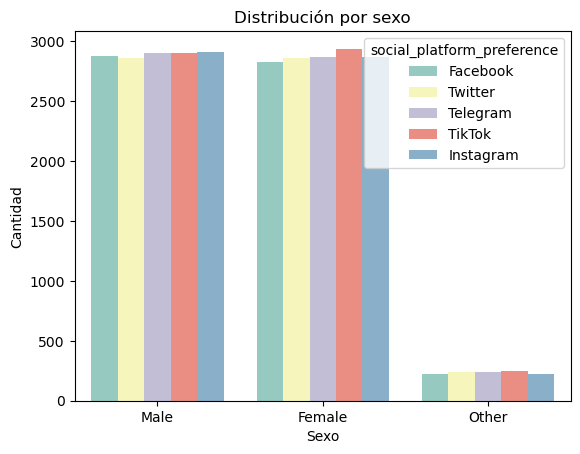

In [35]:
sns.countplot(
    data = data,
    x='gender',
    palette='Set3',
    hue = "social_platform_preference"
)

plt.title('Distribución por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

In [36]:
bins = range(0, data["age"].max() + 20, 20)
labels = [f"{b}-{b+20}" for b in bins[:-1]]

data["age_group"] = pd.cut(
    data["age"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

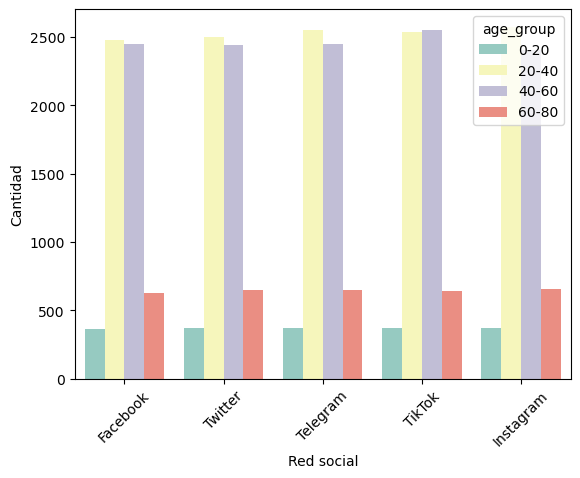

In [37]:
sns.countplot(
    data=data,
    x="social_platform_preference",
    palette='Set3',
    hue="age_group"
)
plt.xticks(rotation=45)
plt.xlabel('Red social')
plt.ylabel('Cantidad')
plt.show()

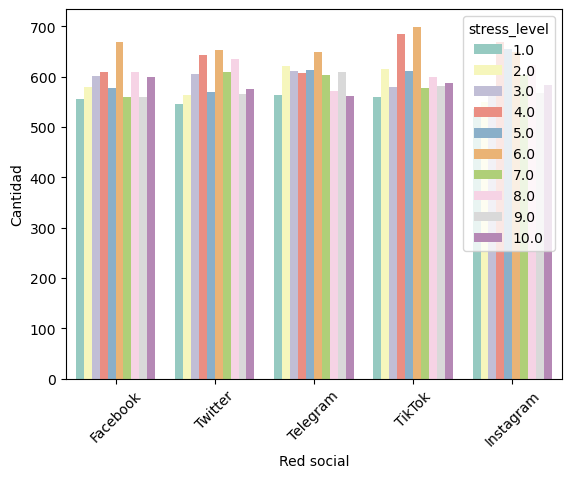

In [38]:
sns.countplot(
    data=data,
    x="social_platform_preference",
    palette='Set3',
    hue="stress_level"
)
plt.xticks(rotation=45)
plt.xlabel('Red social')
plt.ylabel('Cantidad')
plt.show()

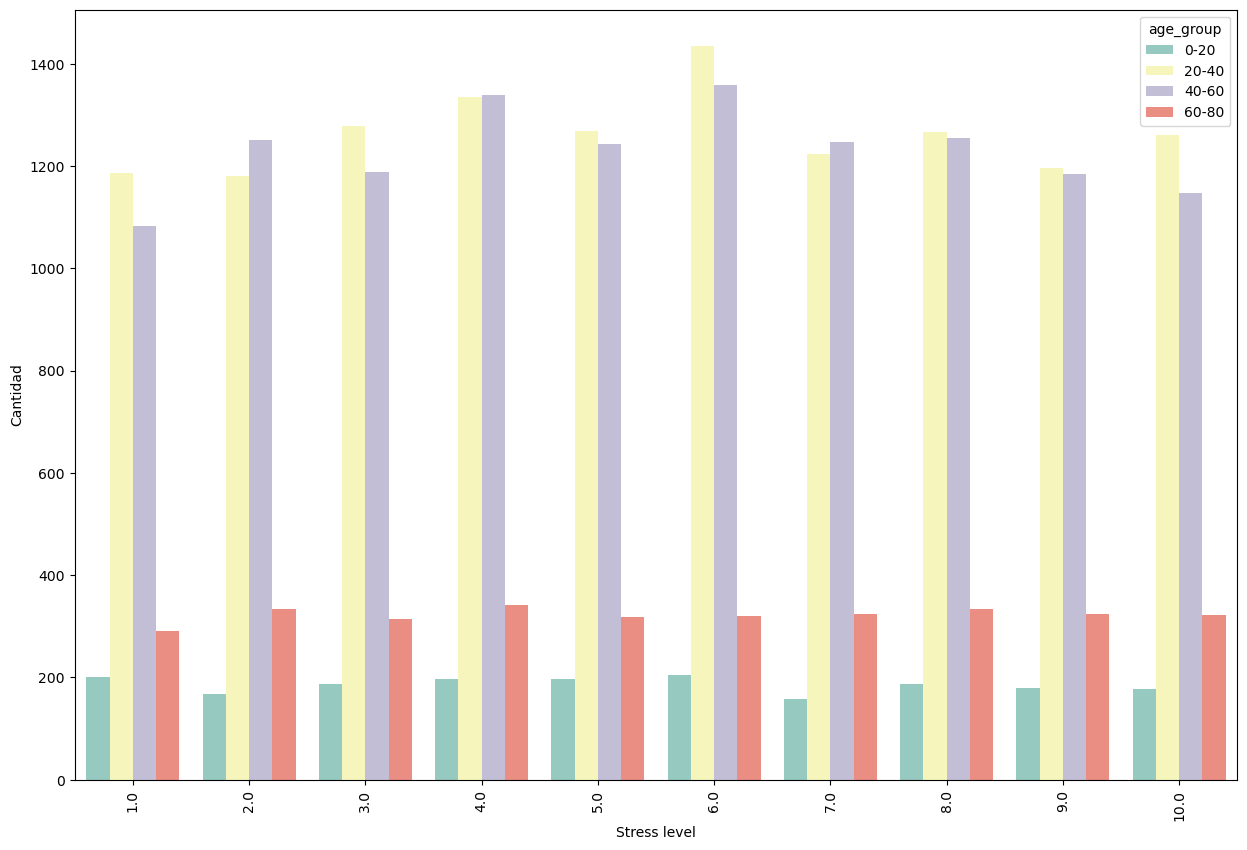

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(
    data=data,
    x="stress_level",
    palette='Set3',
    hue="age_group"
)
plt.xticks(rotation=90)
plt.xlabel('Stress level')
plt.ylabel('Cantidad')
plt.show()

Observamos que el rango de 20-40 tiene mayor estrés que el resto.

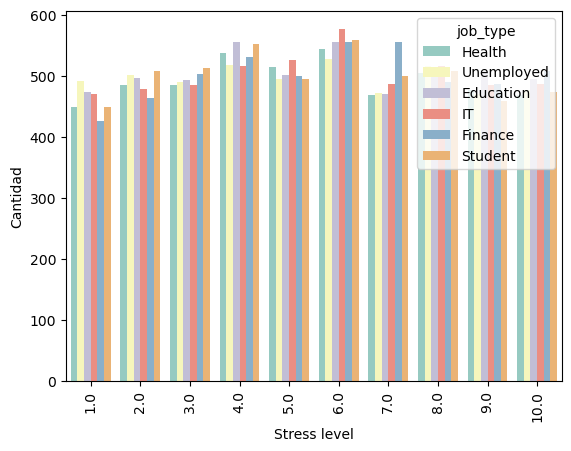

In [40]:
sns.countplot(
    data=data,
    x="stress_level",
    palette='Set3',
    hue="job_type"
)
plt.xticks(rotation=90)
plt.xlabel('Stress level')
plt.ylabel('Cantidad')
plt.show()

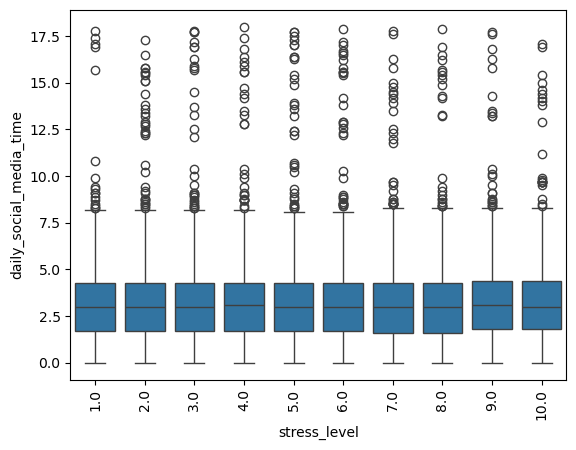

In [41]:
sns.boxplot(
    data=data,
    y="daily_social_media_time",
    x="stress_level"
)
plt.xticks(rotation=90)
plt.show()

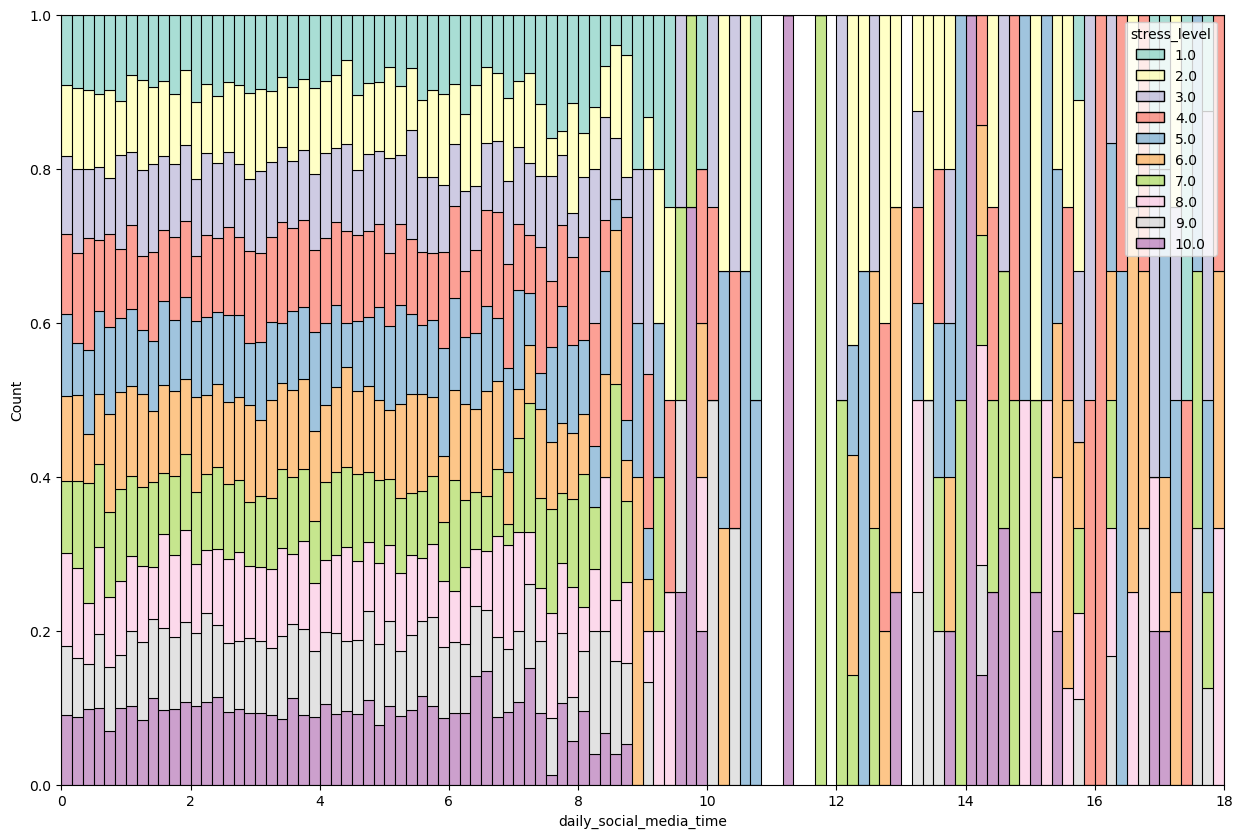

In [42]:
plt.figure(figsize=(15,10))
sns.histplot(
    data=data,
    x="daily_social_media_time",
    hue="stress_level",
    multiple="fill",
    palette='Set3'
)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_14464\1446667787.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='hours_bin', ylabel='stress_level'>

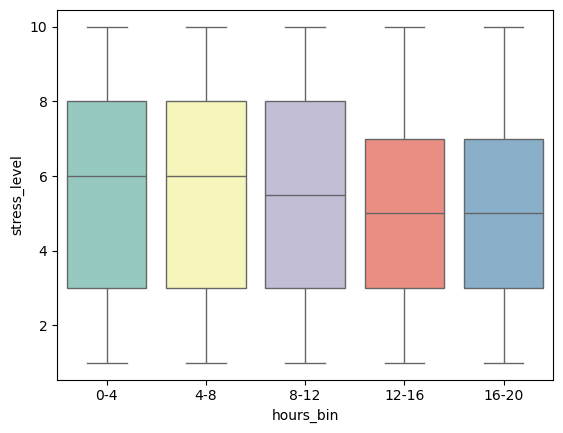

In [43]:
data["hours_bin"] = pd.cut(
    data["daily_social_media_time"],
    bins=[0,4,8,12,16,20],
    labels=["0-4", "4-8", "8-12", "12-16", "16-20"]
)

sns.boxplot(
    data=data,
    x="hours_bin",
    y="stress_level",
    palette='Set3'
)

C:\Users\PC\AppData\Local\Temp\ipykernel_14464\733762215.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("hours_bin")["stress_level"].median().plot(kind="line")


<Axes: xlabel='hours_bin'>

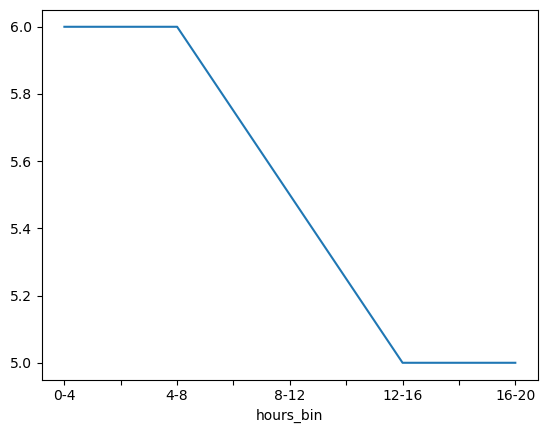

In [44]:
data.groupby("hours_bin")["stress_level"].median().plot(kind="line")


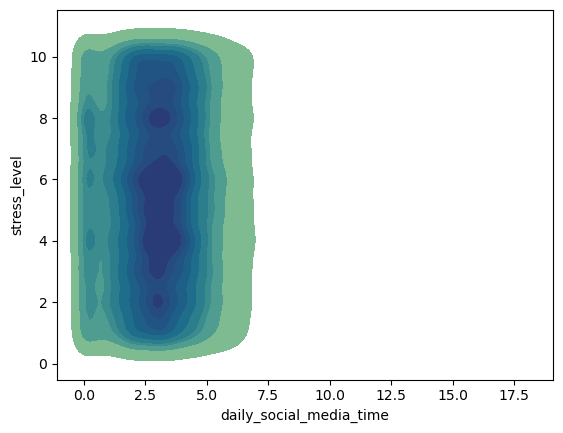

In [45]:
sns.kdeplot(
    data=data,
    x="daily_social_media_time",
    y="stress_level",
    fill=True,
    cmap="crest"
)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_14464\950225763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="daily_social_media_time_bin", palette='Set3')


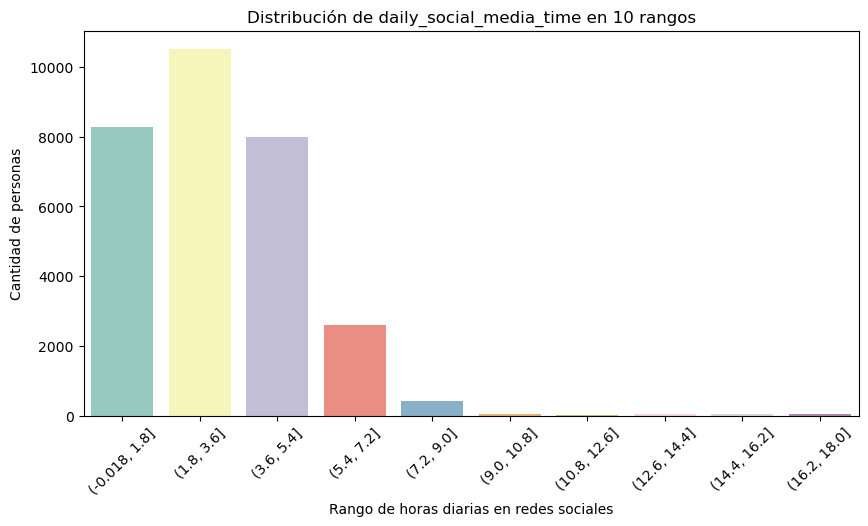

In [46]:
data["daily_social_media_time_bin"] = pd.cut(data["daily_social_media_time"], bins=10)

plt.figure(figsize=(10,5))
sns.countplot(data=data, x="daily_social_media_time_bin", palette='Set3')
plt.xticks(rotation=45)
plt.xlabel("Rango de horas diarias en redes sociales")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de daily_social_media_time en 10 rangos")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_14464\1314634805.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


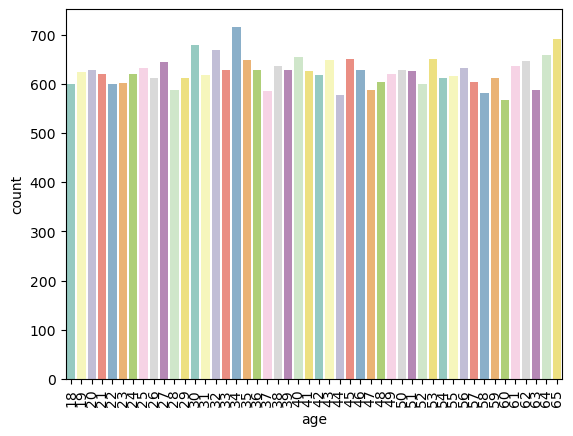

In [47]:
sns.countplot(
    data = data,
    x = "age",
    palette='Set3'    
)
plt.xticks(rotation = 90)
plt.show()

In [48]:
data_menores = data[data["age"] < 19]
data_menores

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,...,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,job_satisfaction_score,age_group,hours_bin,daily_social_media_time_bin
94,18,Female,Unemployed,0.0,Facebook,61,7.3,2.2,1.7,4.0,...,0.2,9,True,False,1,18,2.7,0-20,NaN,"(-0.018, 1.8]"
99,18,Male,Unemployed,3.5,Instagram,62,6.6,8.5,7.8,8.0,...,1.4,3,False,False,7,16,6.4,0-20,0-4,"(1.8, 3.6]"
130,18,Male,Student,1.6,Telegram,59,9.2,6.7,5.8,3.0,...,2.1,0,False,False,1,2,6.2,0-20,0-4,"(-0.018, 1.8]"
136,18,Male,Unemployed,2.4,Telegram,63,10.0,7.0,2.2,5.0,...,1.3,10,False,False,1,26,2.1,0-20,0-4,"(1.8, 3.6]"
181,18,Male,Unemployed,2.2,Instagram,65,10.0,5.5,5.0,4.0,...,0.7,6,False,True,2,19,6.3,0-20,0-4,"(1.8, 3.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29620,18,Female,Finance,4.5,Twitter,63,9.4,5.9,4.9,3.0,...,1.4,2,False,False,4,12,6.4,0-20,4-8,"(3.6, 5.4]"
29739,18,Male,Education,4.5,Facebook,69,6.5,2.1,7.0,1.0,...,0.8,5,False,False,3,12,3.5,0-20,4-8,"(3.6, 5.4]"
29805,18,Male,Education,3.7,Facebook,68,2.5,2.5,2.4,9.0,...,0.0,6,False,False,1,29,2.0,0-20,0-4,"(3.6, 5.4]"
29855,18,Male,Unemployed,3.1,Facebook,62,6.5,4.3,3.9,10.0,...,1.0,1,True,False,2,22,4.3,0-20,0-4,"(1.8, 3.6]"


In [49]:
correlacion = data["daily_social_media_time"].corr(data["stress_level"])
print(correlacion)

0.0008466668632865544


In [50]:
data.groupby("gender").size()

gender
Female    14370
Male      14452
Other      1178
dtype: int64

# *Preguntas*

### **Social Media ↔ Salud mental / bienestar / estrés**

1. ¿Existe correlación entre tiempo diario en redes sociales y niveles de estrés?

In [51]:
correlation = data["daily_social_media_time"].corr(data["stress_level"])
print(f"Correlación entre tiempo en redes sociales y estrés: {correlation:.3f}")

Correlación entre tiempo en redes sociales y estrés: 0.001


En nuestros datos, no existe una correlación fuerte entre el tiempo diario en redes y el nivel de estrés. La relación es muy débil, casi inexistente, y no se observa una tendencia clara.
En el diagrama de dispersión que se muestra, los puntos aparecen muy dispersos y no se observa un patrón ascendente; usuarios con estrés alto aparecen tanto con pocas como con muchas horas de uso. Además, la mediana del estrés se mantiene alrededor de 6 en casi todos los tramos.
No aumenta de forma consistente con más horas.

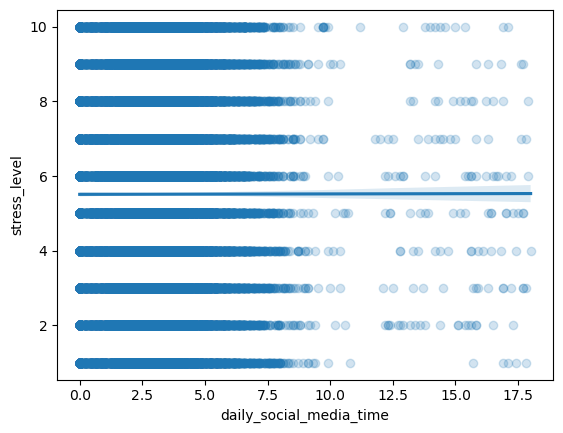

In [52]:
sns.regplot(
    data=data,
    x="daily_social_media_time",
    y="stress_level",
    scatter_kws={"alpha":0.2}
)
plt.show()

En el siguiente gráfico que hemos hecho con histplot, sin embargo, si se muestra un dato interesante.
Para la mayoría del rango diario de uso (de 0 a unas 10 horas), los niveles de estrés se distribuyen bastante uniformes, sin un patrón claro. Esto coincide con lo que comentábamos antes: no hay correlación fuerte en ese tramo.
Sin embargo, en el rango de 10 a 14 horas diarias, sí parece notarse un aumento de las barras correspondientes a niveles de estrés altos (7–10). Esto indica que un uso extremadamente elevado de redes podría asociarse a mayor estrés, aunque ese grupo de usuarios es pequeño comparado con el resto.
Es decir, lo que observamos es que la relación no es lineal para todos los datos, sino que solo emerge cuando el tiempo de uso es muy alto. Para la mayoría de los usuarios, no hay un patrón consistente.

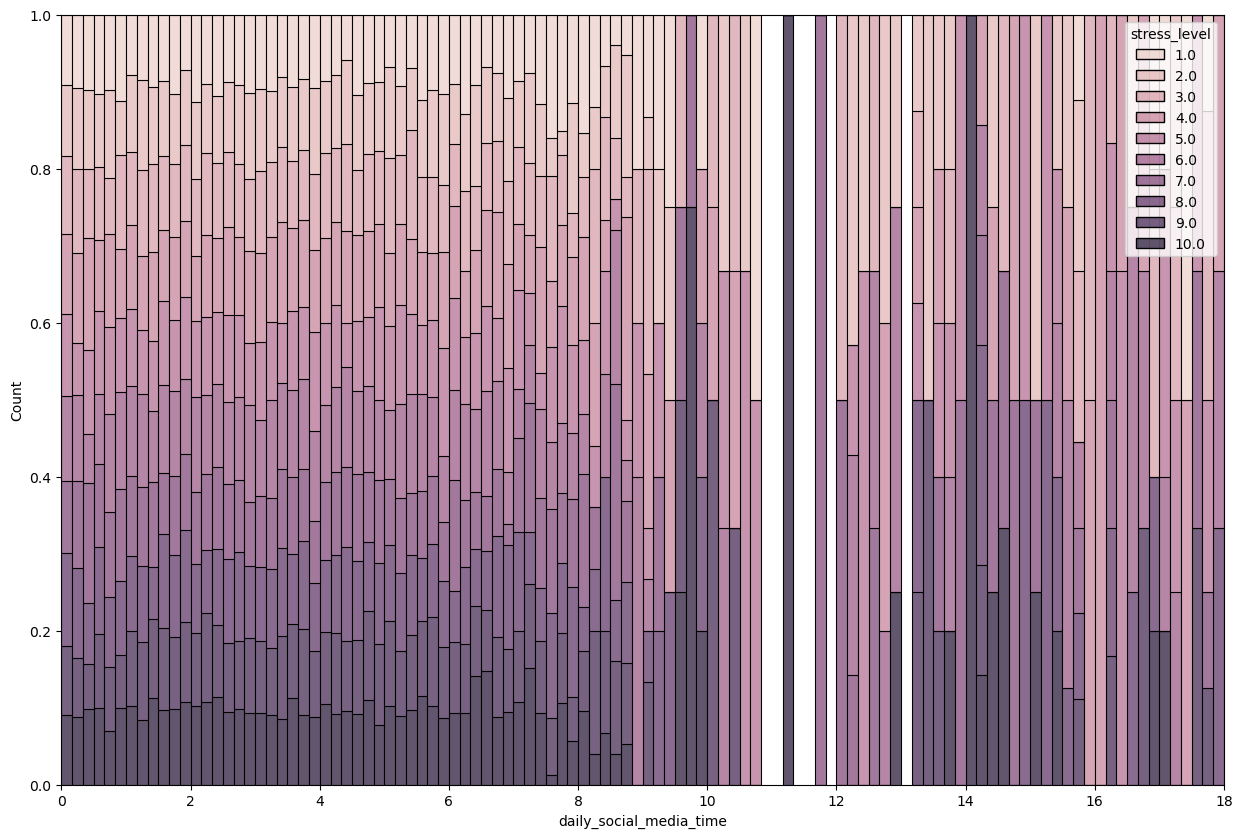

In [53]:
plt.figure(figsize=(15,10))
sns.histplot(
    data=data,
    x="daily_social_media_time",
    hue="stress_level",
    multiple="fill"
)
plt.show()

2. ¿Ciertas plataformas (Instagram, TikTok, Telegram) se asocian a mayor burnout o menor sueño?

<Axes: xlabel='social_platform_preference', ylabel='days_feeling_burnout_per_month'>

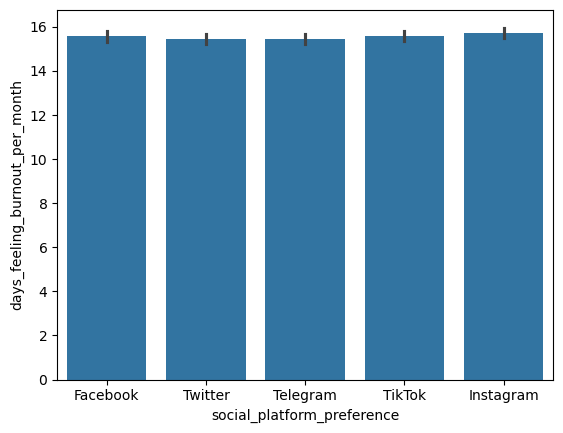

In [54]:
sns.barplot(
    data = data,
    x = "social_platform_preference",
    y = "days_feeling_burnout_per_month"
)

<Axes: xlabel='social_platform_preference', ylabel='count'>

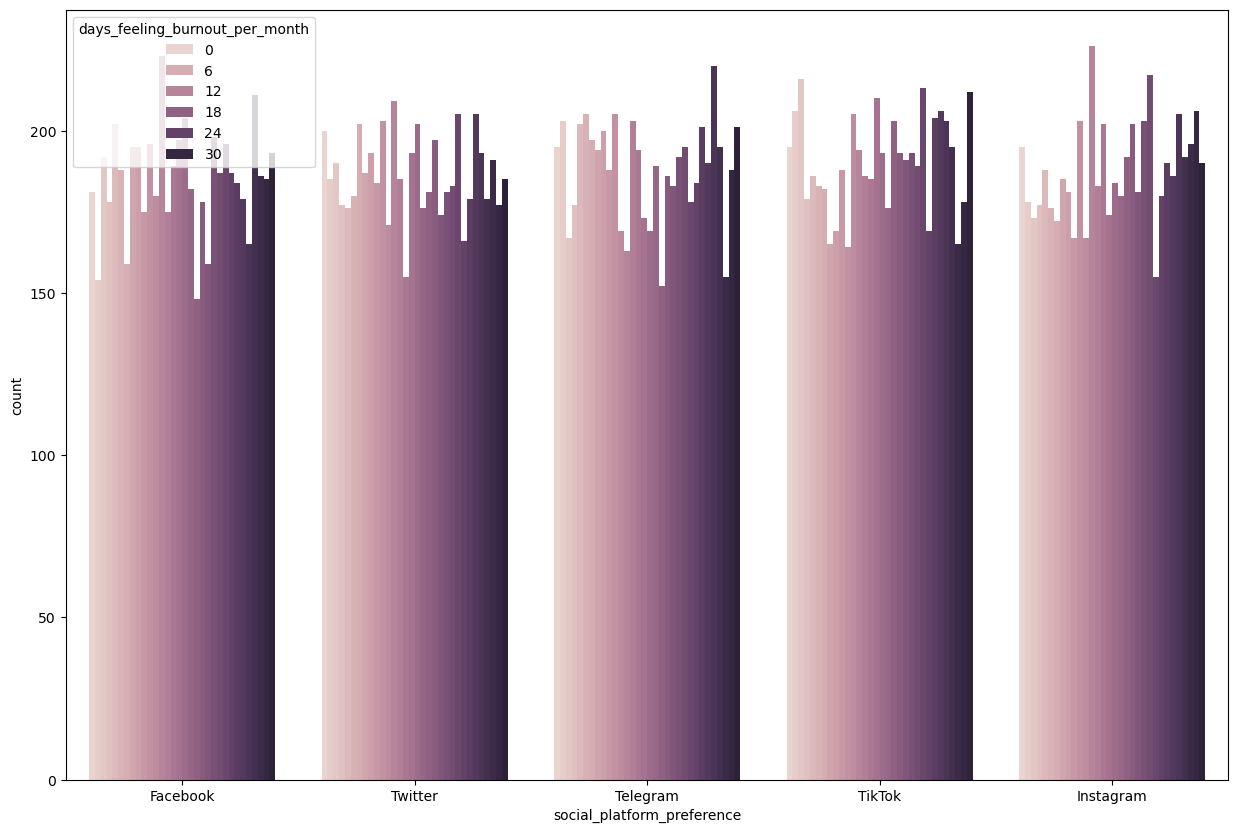

In [55]:
plt.figure(figsize=(15,10))
sns.countplot(
    data = data, 
    x = "social_platform_preference", 
    hue = "days_feeling_burnout_per_month"
)

<Axes: xlabel='days_feeling_burnout_per_month', ylabel='Count'>

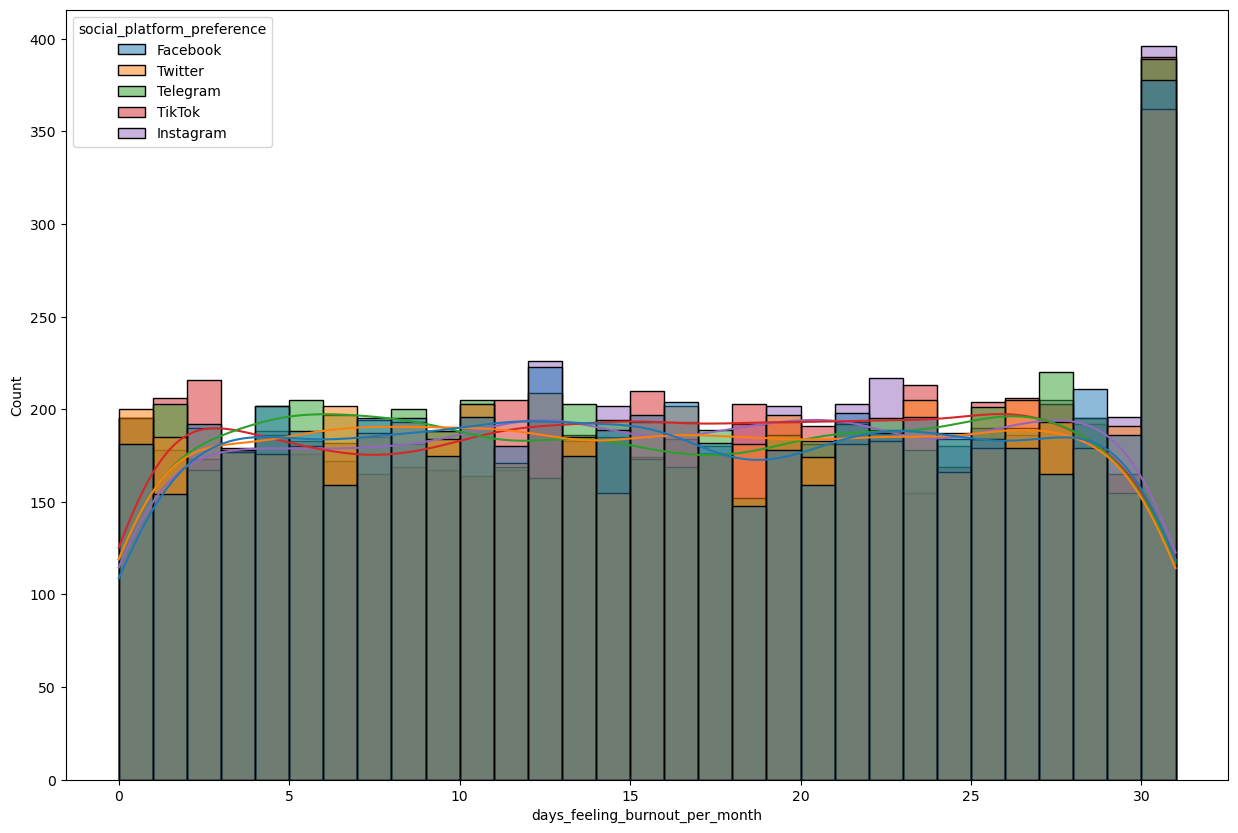

In [56]:
plt.figure(figsize=(15,10))
sns.histplot(
    data = data, 
    x = "days_feeling_burnout_per_month", 
    kde = "social_platform_preference",
    hue = "social_platform_preference"
)

<Axes: xlabel='sleep_hours', ylabel='Count'>

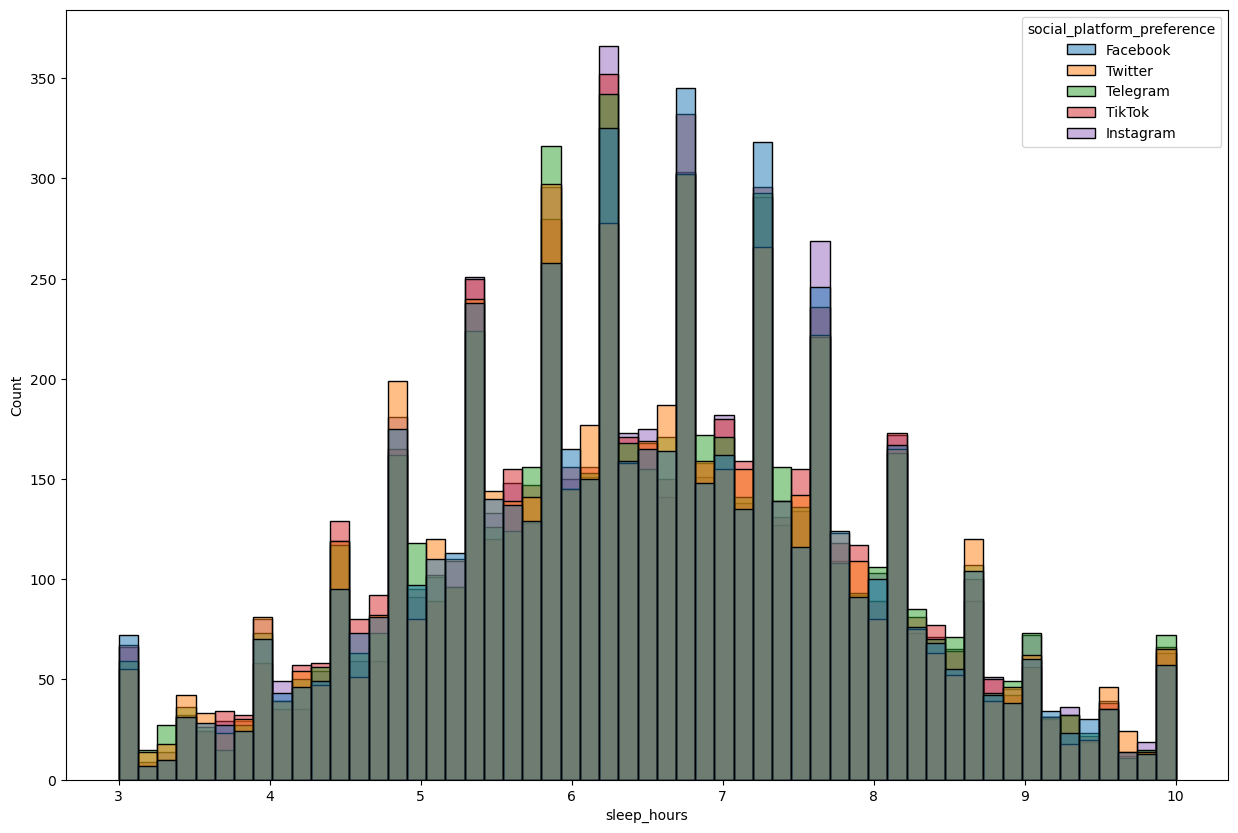

In [57]:
plt.figure(figsize=(15,10))
sns.histplot(
    data = data, 
    x = "sleep_hours", 
    hue = "social_platform_preference"
)

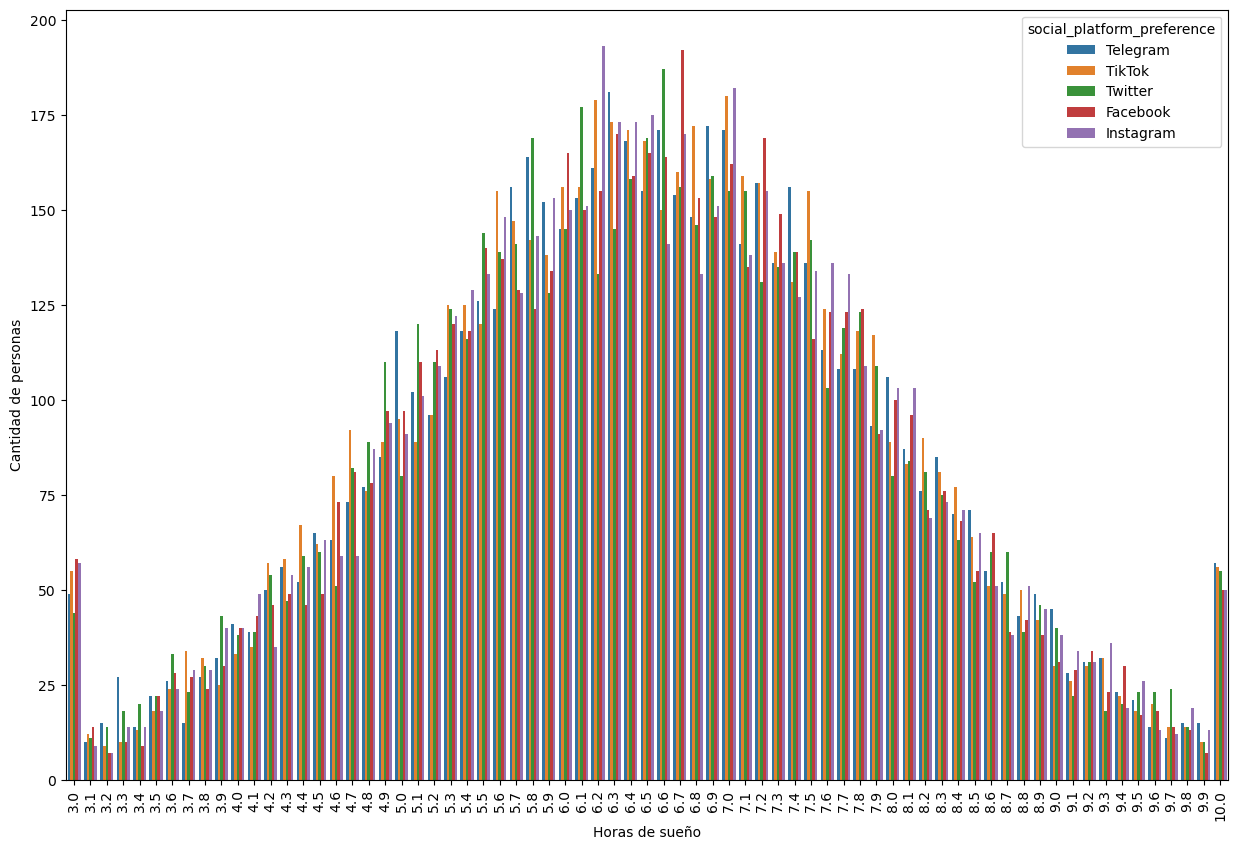

In [58]:
plt.figure(figsize=(15,10))
sns.countplot(
    data = data, 
    x = "sleep_hours",
    hue = "social_platform_preference")
plt.xticks(rotation = 90)
plt.xlabel('Horas de sueño')
plt.ylabel('Cantidad de personas')
plt.show()

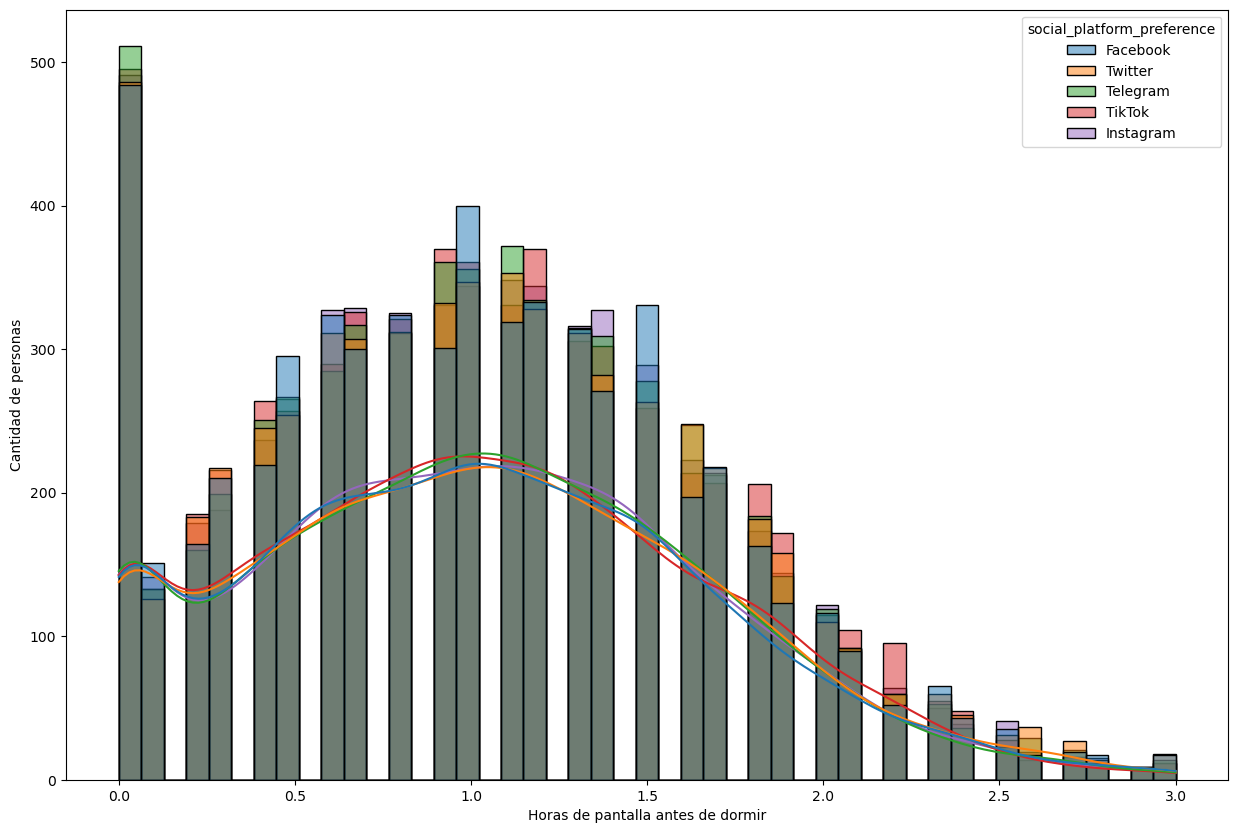

In [59]:
plt.figure(figsize=(15,10))
sns.histplot(
    data = data,
    x = "screen_time_before_sleep", 
    kde = "social_platform_preference",
    hue = "social_platform_preference", 
    cumulative = False
)
plt.xlabel('Horas de pantalla antes de dormir')
plt.ylabel('Cantidad de personas')
plt.show()

Sí, podemos observar que el nivel de burnout y el nivel de pocas horas de sueño se ve afectado por las diferentes redes sociales como podemos observar en estos gráficos. Vemos incluso que llega al nivel de 30 días con burnout cierto grupo personas y que Instragram es la que más afecta cada día. Y por ejemplo, en la última vemos que Telegram que es una red social de chat, es en la que más tiempo emplean las personas antes de ir a dormir. 

3. ¿Las notificaciones diarias influyen en la cantidad de horas dormidas o en el estrés?

<Figure size 1500x1000 with 0 Axes>

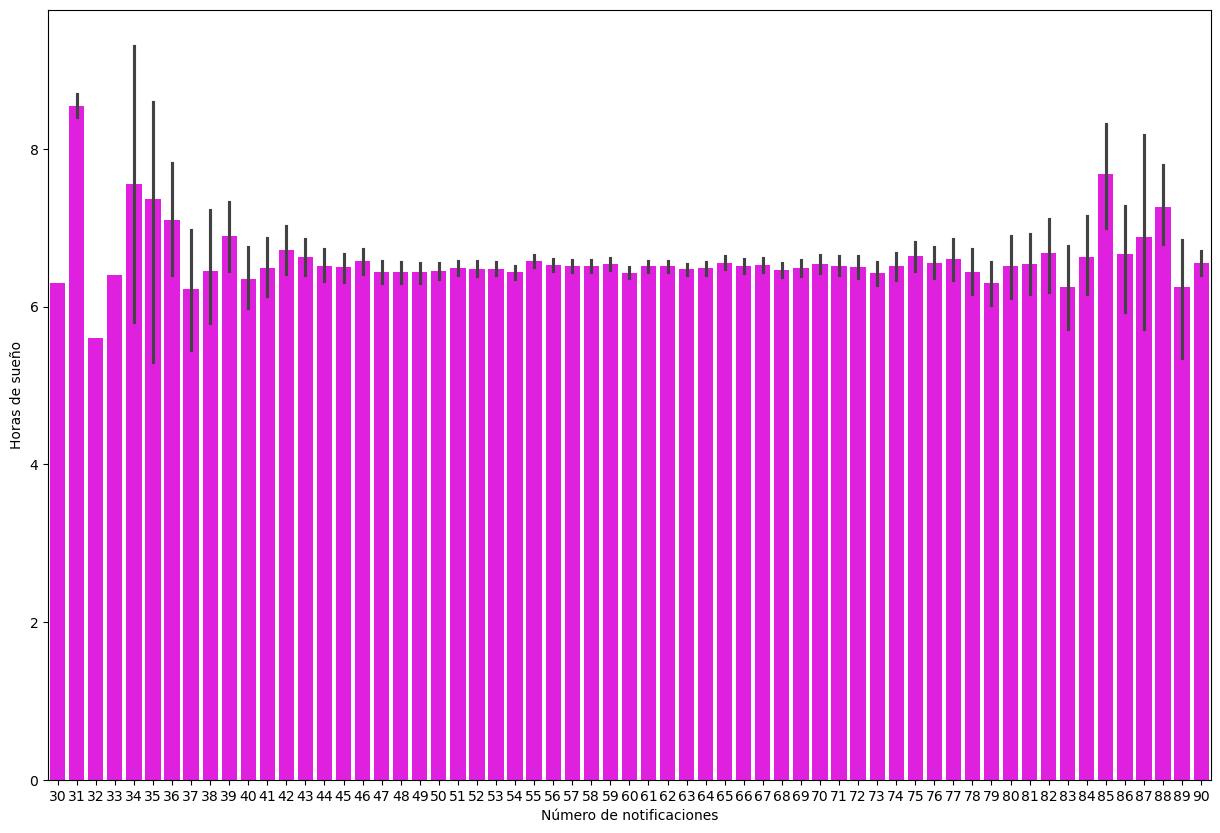

In [60]:
plt.figure(figsize=(15,10))
plt.figure(figsize=(15,10))
sns.barplot(
    data = data,
    x = "number_of_notifications",
    y = "sleep_hours",
    color = "magenta"
)
plt.xlabel('Número de notificaciones')
plt.ylabel('Horas de sueño')
plt.show()

<Figure size 1500x1000 with 0 Axes>

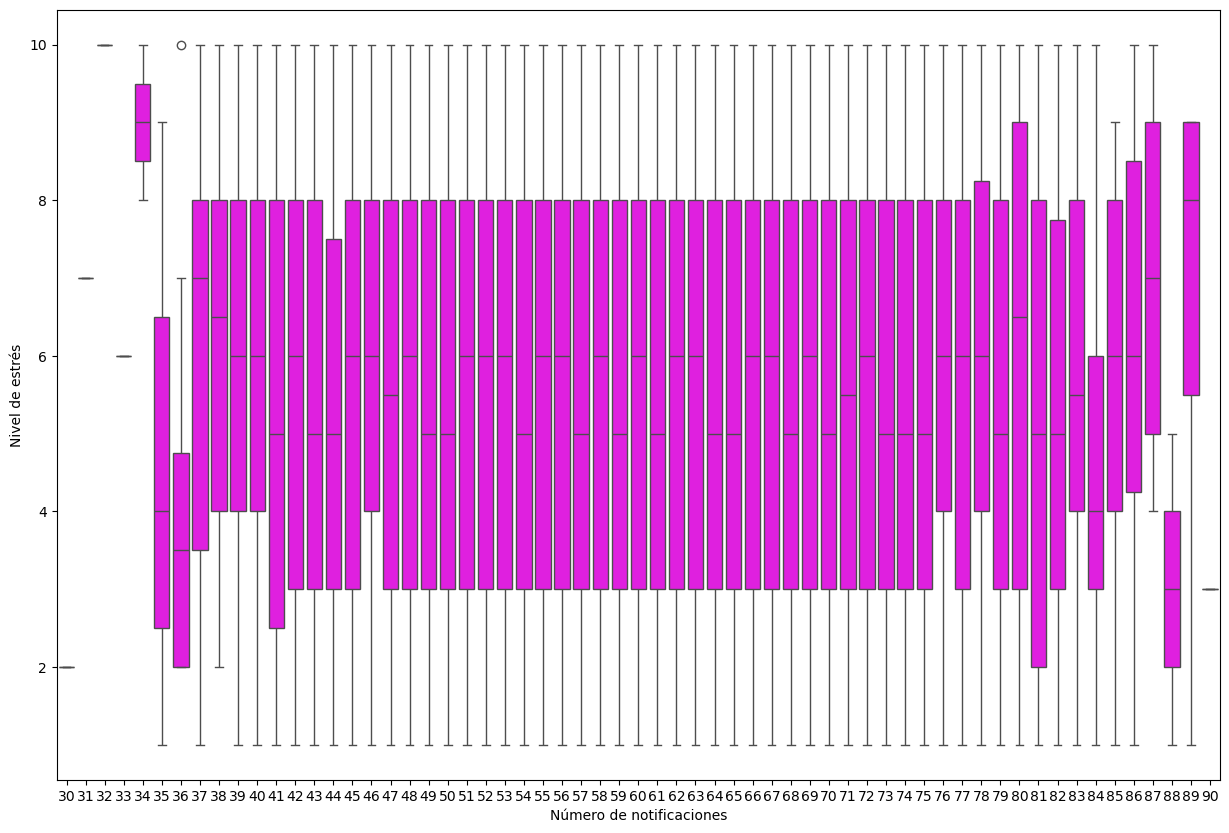

In [61]:
plt.figure(figsize=(15,10))
plt.figure(figsize=(15,10))
sns.boxplot(
    data = data,
    x = "number_of_notifications",
    y = "stress_level",
    color = "magenta"
)
plt.xlabel('Número de notificaciones')
plt.ylabel('Nivel de estrés')
plt.show()

In [62]:
data.groupby("number_of_notifications")["stress_level"].size()

number_of_notifications
30     1
31     2
32     1
33     1
34     2
      ..
86    10
87     9
88     3
89     4
90     2
Name: stress_level, Length: 61, dtype: int64

In [63]:
grafico = data.groupby("number_of_notifications")[["stress_level"]].mean()

<Axes: xlabel='stress_level', ylabel='number_of_notifications'>

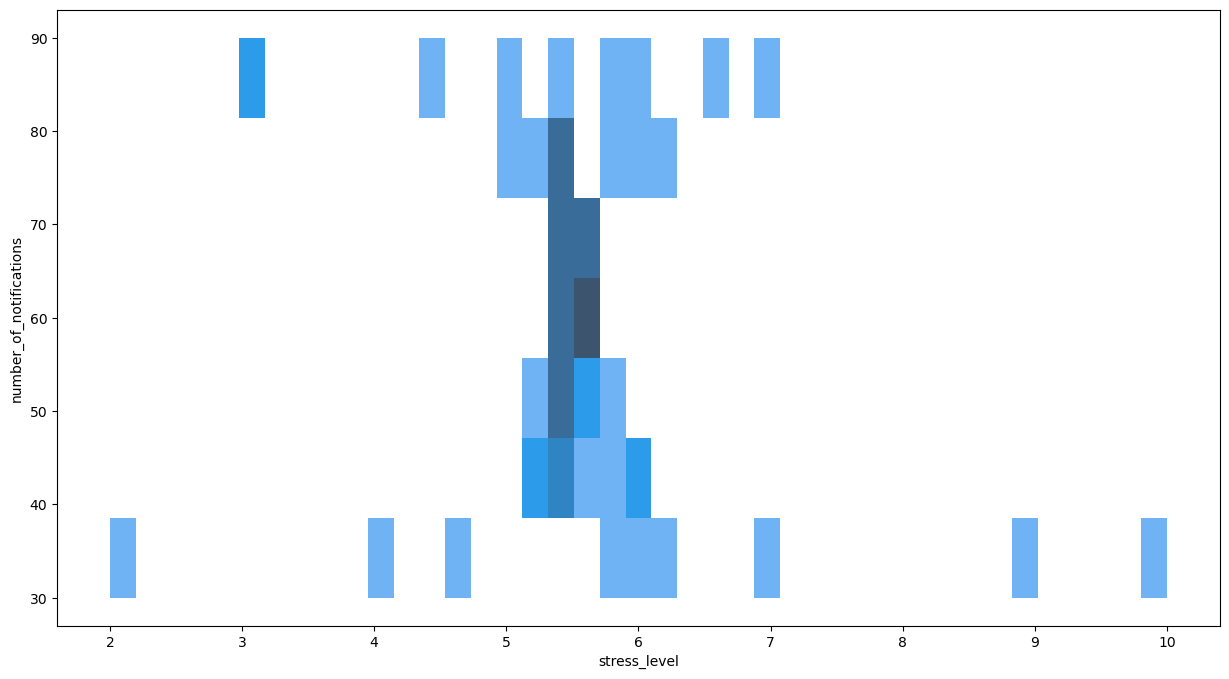

In [64]:
plt.figure(figsize=(15,8))
sns.histplot(
    data = grafico, 
    x = "stress_level", 
    y = "number_of_notifications"
)

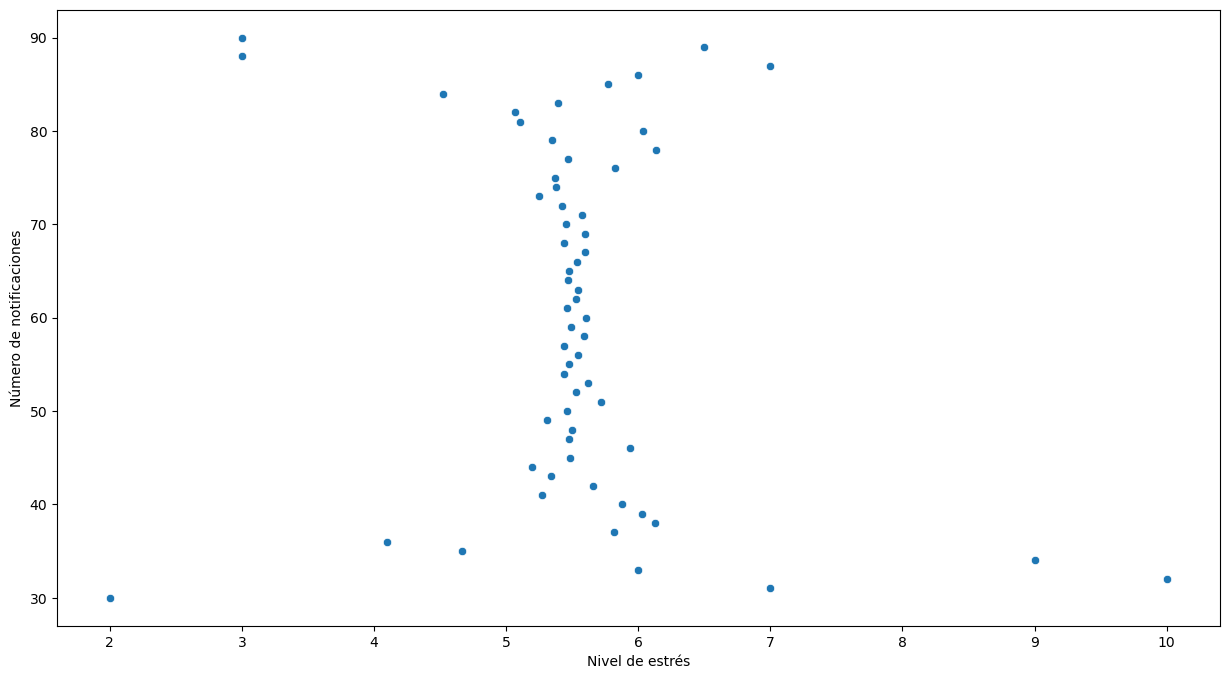

In [65]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data = grafico,
    x = "stress_level", 
    y = "number_of_notifications"
)
plt.xlabel('Nivel de estrés')
plt.ylabel('Número de notificaciones')
plt.show()

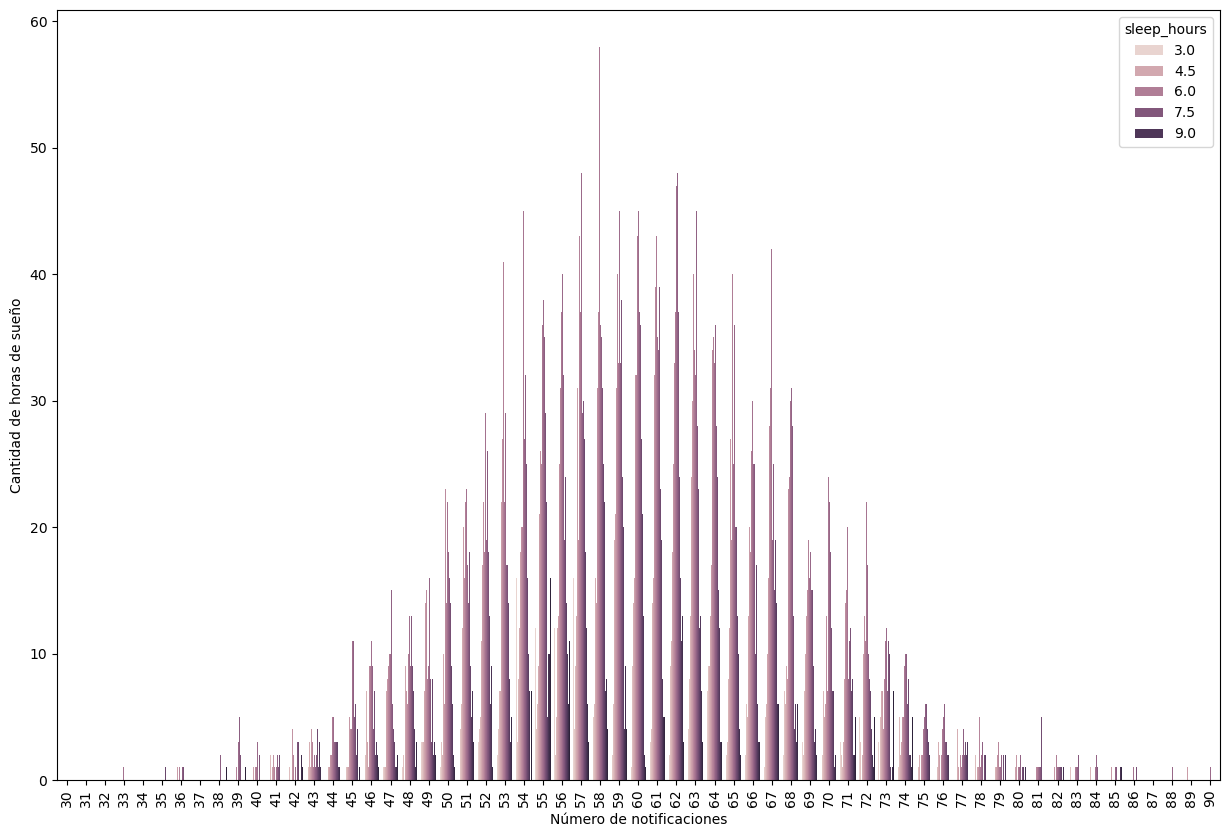

In [66]:
plt.figure(figsize=(15,10))
sns.countplot(
    data = data, 
    x = "number_of_notifications",
    hue = "sleep_hours")
plt.xticks(rotation = 90)
plt.xlabel('Número de notificaciones')
plt.ylabel('Cantidad de horas de sueño')
plt.show()

In [67]:
data2 = data.copy()

In [68]:
bins = [30, 50, 70, 90]
labels = ["30–50", "50–70", "70–90"]

data2["notificaciones_agrupadas"] = pd.cut(
    data2["number_of_notifications"], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

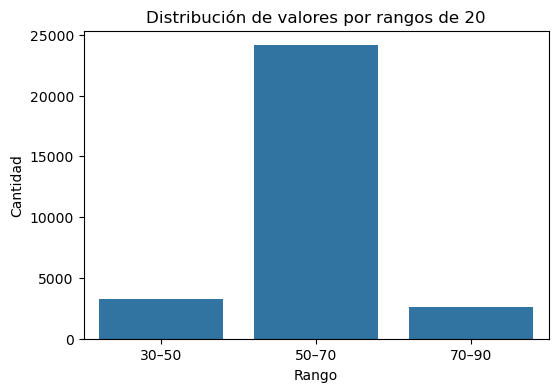

In [69]:
plt.figure(figsize=(6,4))
sns.countplot(x="notificaciones_agrupadas", data=data2)
plt.title("Distribución de valores por rangos de 20")
plt.xlabel("Rango")
plt.ylabel("Cantidad")
plt.show()

<Axes: xlabel='notificaciones_agrupadas', ylabel='sleep_hours'>

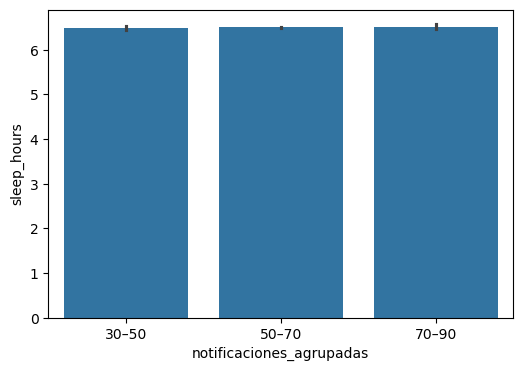

In [70]:
plt.figure(figsize=(6,4))
sns.barplot(
    data = data2,
    x = "notificaciones_agrupadas",
    y = "sleep_hours"
)

C:\Users\PC\AppData\Local\Temp\ipykernel_14464\1667836985.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grafico = data2.groupby("notificaciones_agrupadas")[["stress_level"]].mean()


<Axes: xlabel='stress_level', ylabel='notificaciones_agrupadas'>

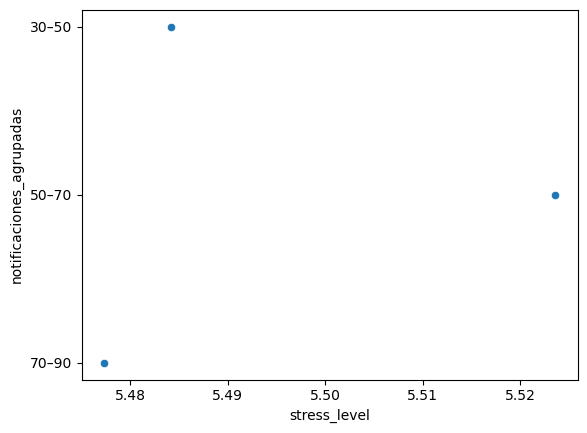

In [71]:
grafico = data2.groupby("notificaciones_agrupadas")[["stress_level"]].mean()

sns.scatterplot(
    data = grafico, 
    x = "stress_level", 
    y = "notificaciones_agrupadas"
)

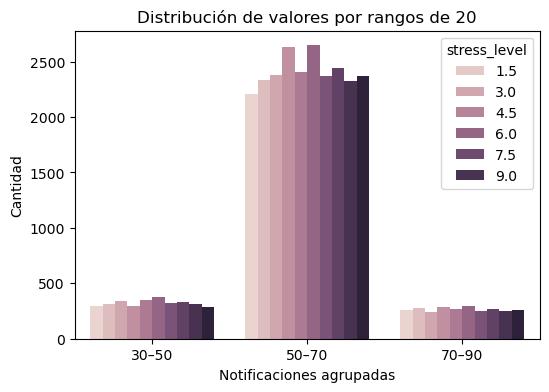

In [72]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="notificaciones_agrupadas", 
    data=data2, 
    hue = "stress_level")
plt.title("Distribución de valores por rangos de 20")
plt.xlabel("Notificaciones agrupadas")
plt.ylabel("Cantidad")
plt.show()

Tras todas las gráficas realizadas para observar los datos estudiados, observamos que dónde la mayoría de personas está es en un nivel de estrés de nivel 5,5 - 6. Pero no observamos que afecte ni las horas de sueño (media 6,5h) ni las notificaciones recibidas con el estrés. 

No vemos que influya las notificaciones diarias en cantidad de horas dormidas (media 6,5) y estres (media 5,5).

4.¿El uso de apps de enfoque o Digital Wellbeing reduce el estrés o burnout?

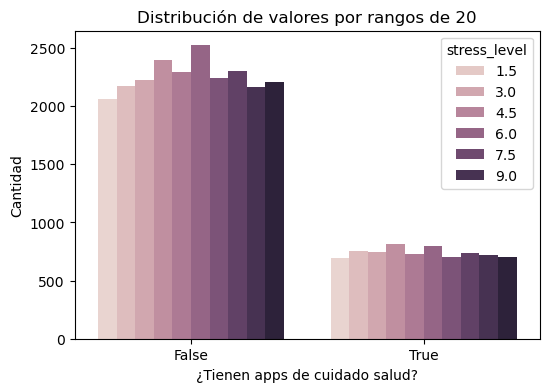

In [73]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="has_digital_wellbeing_enabled", 
    data=data2, 
    hue = "stress_level"
)
plt.title("Distribución de valores por rangos de 20")
plt.xlabel("¿Tienen apps de cuidado salud?")
plt.ylabel("Cantidad")
plt.show()

In [74]:
data2["stress_level"] = data2["stress_level"].replace({
    0: "Nivel bajo",
    1: "Nivel bajo",
    2: "Nivel bajo",
    3: "Nivel bajo",
    4: "Nivel medio",
    5: "Nivel medio",
    5.514058940774487: "Nivel medio",
    6: "Nivel medio",
    7: "Nivel medio",
    8: "Nivel alto",
    9: "Nivel alto",
    10: "Nivel alto",
})

In [75]:
data2["stress_level"].unique()

array(['Nivel medio', 'Nivel bajo', 'Nivel alto'], dtype=object)

In [76]:
data.columns

Index(['age', 'gender', 'job_type', 'daily_social_media_time',
       'social_platform_preference', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'coffee_consumption_per_day',
       'days_feeling_burnout_per_month', 'job_satisfaction_score', 'age_group',
       'hours_bin', 'daily_social_media_time_bin'],
      dtype='object')

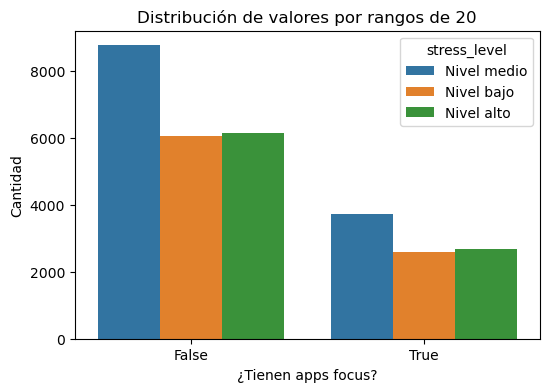

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="uses_focus_apps", 
    data=data2, 
    hue = "stress_level"
)
plt.title("Distribución de valores por rangos de 20")
plt.xlabel("¿Tienen apps focus?")
plt.ylabel("Cantidad")
plt.show()

In [78]:
data.columns

Index(['age', 'gender', 'job_type', 'daily_social_media_time',
       'social_platform_preference', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'coffee_consumption_per_day',
       'days_feeling_burnout_per_month', 'job_satisfaction_score', 'age_group',
       'hours_bin', 'daily_social_media_time_bin'],
      dtype='object')

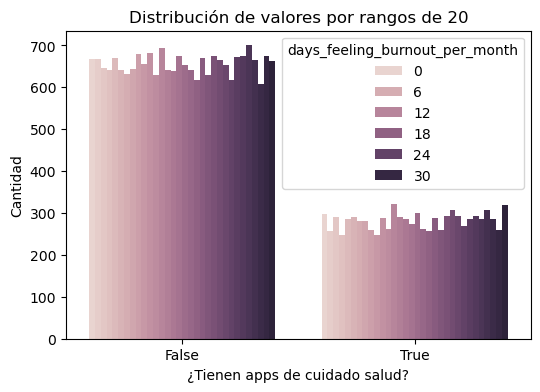

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="uses_focus_apps", 
    data=data2, 
    hue = "days_feeling_burnout_per_month"
)
plt.title("Distribución de valores por rangos de 20")
plt.xlabel("¿Tienen apps de cuidado salud?")
plt.ylabel("Cantidad")
plt.show()

In [80]:
data2["days_feeling_burnout_per_month"] = data2["days_feeling_burnout_per_month"].replace({
    0: "Poco burnout",
    1: "Poco burnout",
    2: "Poco burnout",
    3: "Poco burnout",
    4: "Poco burnout",
    5: "Poco burnout",
    6: "Poco burnout",
    7: "Poco burnout",
    8: "Poco burnout",
    9: "Poco burnout",
    10: "Poco burnout",
    11: "Medio burnout",
    12: "Medio burnout",
    13: "Medio burnout",
    14: "Medio burnout",
    15: "Medio burnout",
    16: "Medio burnout",
    17: "Medio burnout",
    18: "Medio burnout",
    19: "Medio burnout",
    20: "Medio burnout",
    21: "Alto burnout",
    22: "Alto burnout",
    23: "Alto burnout",
    24: "Alto burnout",
    25: "Alto burnout",
    26: "Alto burnout",
    27: "Alto burnout",
    28: "Alto burnout",
    29: "Alto burnout",
    30: "Alto burnout",
    31: "Alto burnout",    
})

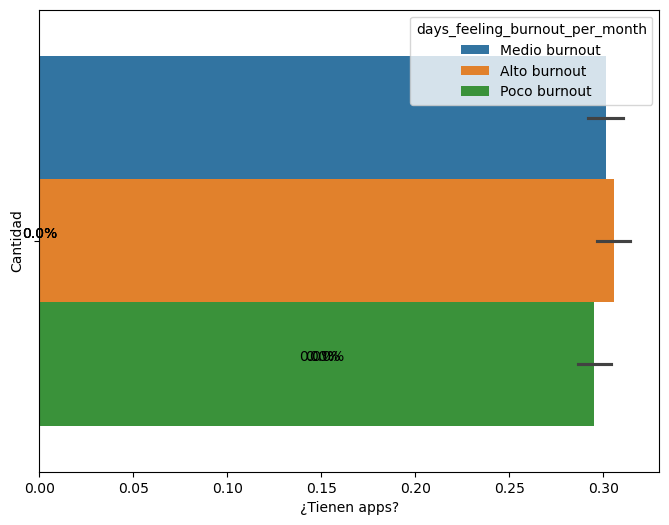

In [81]:
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data = data2,
    x = "uses_focus_apps",
    hue = "days_feeling_burnout_per_month"
)
# Total de filas para calcular porcentajes
total = len(data2)

# Añadir porcentajes encima de cada barra
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    
    ax.annotate(f"{percentage:.1f}%", (x, y), ha="center", va="bottom")
plt.xlabel("¿Tienen apps?")
plt.ylabel("Cantidad")
plt.show()

La conclusión es que hay un burnout muy alto aunque se use la app, solo que cuando se usan, se reducen los niveles altos. Pero es representativo la cantidad de gente que está en el medio-alto de burnout.

In [82]:
data2

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,...,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,job_satisfaction_score,age_group,hours_bin,daily_social_media_time_bin,notificaciones_agrupadas
0,56,Male,Unemployed,4.2,Facebook,61,6.8,8.0,7.3,Nivel medio,...,8,False,False,4,Medio burnout,6.3,40-60,4-8,"(3.6, 5.4]",50–70
1,46,Male,Health,3.2,Twitter,59,9.2,5.1,5.2,Nivel medio,...,7,True,True,2,Alto burnout,3.4,40-60,0-4,"(1.8, 3.6]",50–70
2,32,Male,Finance,2.8,Twitter,57,7.9,3.9,3.5,Nivel medio,...,0,True,False,3,Medio burnout,2.5,20-40,0-4,"(1.8, 3.6]",50–70
3,60,Female,Unemployed,2.4,Facebook,59,6.4,2.9,1.8,Nivel medio,...,1,False,False,0,Poco burnout,1.7,40-60,0-4,"(1.8, 3.6]",50–70
4,25,Male,IT,1.9,Telegram,66,6.2,8.9,2.9,Nivel medio,...,1,False,True,1,Alto burnout,9.7,20-40,0-4,"(1.8, 3.6]",50–70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.9,Facebook,59,10.2,3.3,3.5,Nivel alto,...,9,False,False,4,Poco burnout,4.4,20-40,0-4,"(1.8, 3.6]",50–70
29996,39,Male,Health,4.4,Instagram,46,4.7,8.1,6.7,Nivel alto,...,3,False,False,1,Alto burnout,6.2,20-40,4-8,"(3.6, 5.4]",30–50
29997,42,Male,Education,17.7,TikTok,64,10.9,8.6,8.7,Nivel medio,...,10,False,False,1,Poco burnout,6.3,40-60,16-20,"(16.2, 18.0]",50–70
29998,20,Female,Education,3.8,Instagram,56,6.9,7.8,6.9,Nivel alto,...,1,False,False,2,Poco burnout,7.9,0-20,0-4,"(3.6, 5.4]",50–70


### **Social Media ↔ Productividad**

In [83]:
prod = data.copy()

1. ¿Existe una relación inversa entre tiempo en redes sociales y productividad (perceived vs actual)?

In [84]:
prod.actual_productivity_score = prod.actual_productivity_score.round(0)
prod.actual_productivity_score

0        7.0
1        5.0
2        4.0
3        2.0
4        3.0
        ... 
29995    4.0
29996    7.0
29997    9.0
29998    7.0
29999    5.0
Name: actual_productivity_score, Length: 30000, dtype: float64

<Axes: xlabel='actual_productivity_score', ylabel='Count'>

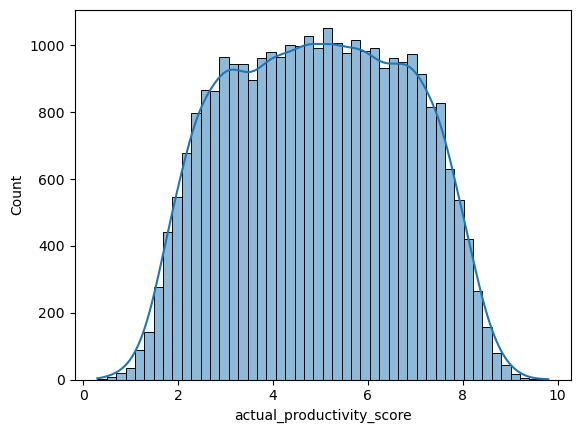

In [85]:
sns.histplot(
    data=data2,
    x = "actual_productivity_score",
    kde = "perceived_productivity_score"
)

Las personas atienen una percepción de sí misma más alta que lo que es en verdad su productividad real.

In [86]:
diferencia = prod.actual_productivity_score.mean() - prod.perceived_productivity_score.mean()

diferencia.sum()

np.float64(-0.5580633333333322)

In [87]:
prod.daily_social_media_time = prod.daily_social_media_time.round(0)
prod.daily_social_media_time

0         4.0
1         3.0
2         3.0
3         2.0
4         2.0
         ... 
29995     2.0
29996     4.0
29997    18.0
29998     4.0
29999     4.0
Name: daily_social_media_time, Length: 30000, dtype: float64

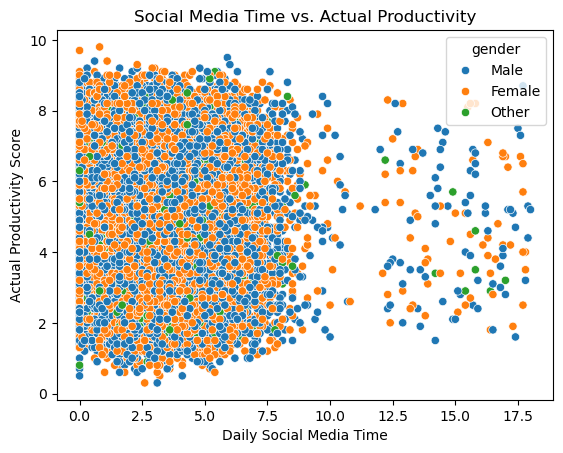

In [88]:
sns.scatterplot(
    data=data, 
    x="daily_social_media_time",
    y="actual_productivity_score",
    hue="gender")
plt.title("Social Media Time vs. Actual Productivity")
plt.xlabel("Daily Social Media Time")
plt.ylabel("Actual Productivity Score")
plt.show()

En el gráfico podemos observar que cuanto más uso le dan a las redes socilaes, su productividad baja. Y se ve una gran diferencia sobre todo, con quiénes tienen un uso menor. Podemos observar una forma de "D" con los puntitos. 

2. ¿Influyen los descansos en la productividad de las personas?

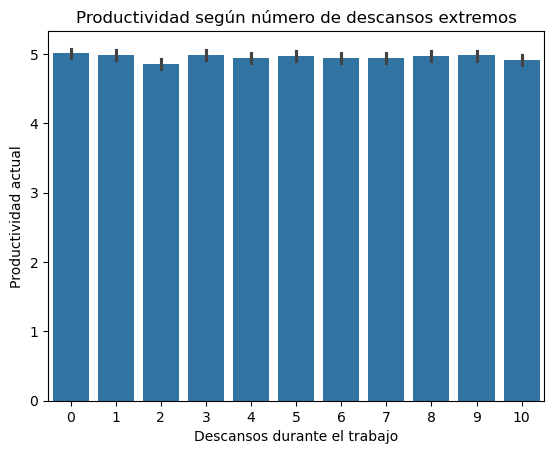

In [89]:
sns.barplot(
    data = prod,
    x = "breaks_during_work",
    y = "actual_productivity_score"
)
plt.title("Productividad según número de descansos extremos")
plt.xlabel('Descansos durante el trabajo')
plt.ylabel('Productividad actual')
plt.show()

Da igual los descansos que se realicen, ya que no afecta en la productividad. Ya que observamos que tiene el mismo nivel de productividad el que hace 0 descansos que el que hace 10. Conclusión: "Descansa cuando lo necesites"

3. ¿Las personas que usan apps de foco o tienen Digital Wellbeing activado tienen mejores scores de productividad?

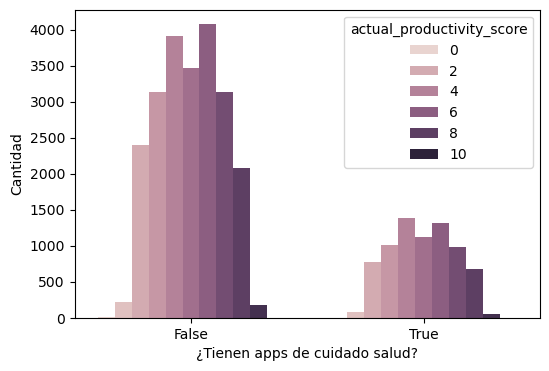

In [90]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="has_digital_wellbeing_enabled", 
    data=prod, 
    hue = "actual_productivity_score"
)
plt.xlabel("¿Tienen apps de cuidado salud?")
plt.ylabel("Cantidad")
plt.show()

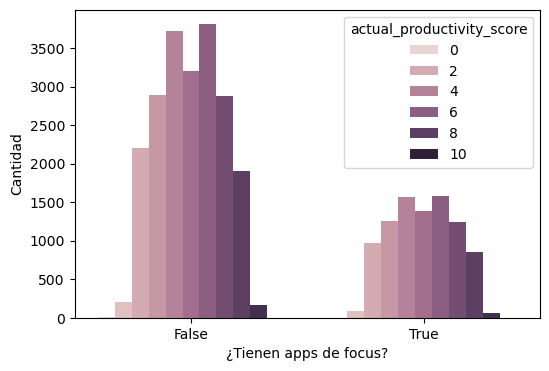

In [91]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="uses_focus_apps", 
    data=prod, 
    hue = "actual_productivity_score"
)
plt.xlabel("¿Tienen apps de focus?")
plt.ylabel("Cantidad")
plt.show()

Podemos observar que el uso de este tipo de apps, no afecta en el nivel de productividad de las personas. 

3. ¿Las plataformas más “consumidoras de tiempo” impactan más la productividad que otras?

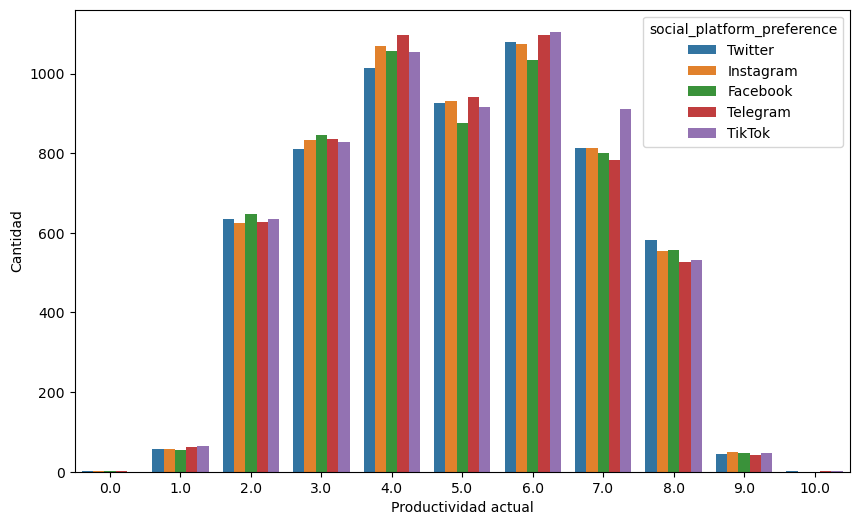

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(
    x="actual_productivity_score", 
    data=prod, 
    hue = "social_platform_preference"
)
plt.xlabel("Productividad actual")
plt.ylabel("Cantidad")
plt.show()

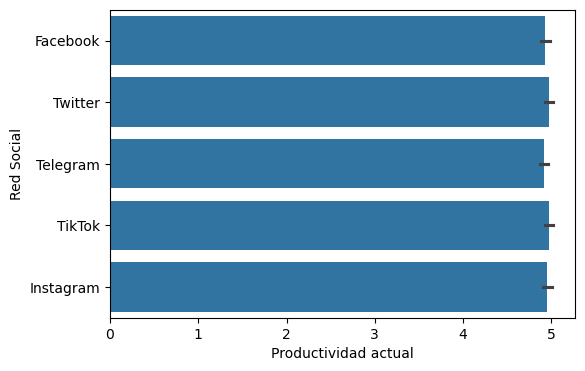

In [93]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="actual_productivity_score", 
    data=prod, 
    y = "social_platform_preference"
)
plt.ylabel("Red Social")
plt.xlabel("Productividad actual")
plt.show()

No influye en la productividad dependiendo la red social que utilices. Aunque podemos apreciar que tenemos una puntuacion del 1 al 10 y la media es menor a 5, por lo que podemos apreciar que influye negativamente, pero sin poder comparar con alguien que no use redes sociales.

# Modelo SOCIAL MEDIA  ↔  ESTRÉS

In [94]:
data2

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,...,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,job_satisfaction_score,age_group,hours_bin,daily_social_media_time_bin,notificaciones_agrupadas
0,56,Male,Unemployed,4.2,Facebook,61,6.8,8.0,7.3,Nivel medio,...,8,False,False,4,Medio burnout,6.3,40-60,4-8,"(3.6, 5.4]",50–70
1,46,Male,Health,3.2,Twitter,59,9.2,5.1,5.2,Nivel medio,...,7,True,True,2,Alto burnout,3.4,40-60,0-4,"(1.8, 3.6]",50–70
2,32,Male,Finance,2.8,Twitter,57,7.9,3.9,3.5,Nivel medio,...,0,True,False,3,Medio burnout,2.5,20-40,0-4,"(1.8, 3.6]",50–70
3,60,Female,Unemployed,2.4,Facebook,59,6.4,2.9,1.8,Nivel medio,...,1,False,False,0,Poco burnout,1.7,40-60,0-4,"(1.8, 3.6]",50–70
4,25,Male,IT,1.9,Telegram,66,6.2,8.9,2.9,Nivel medio,...,1,False,True,1,Alto burnout,9.7,20-40,0-4,"(1.8, 3.6]",50–70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.9,Facebook,59,10.2,3.3,3.5,Nivel alto,...,9,False,False,4,Poco burnout,4.4,20-40,0-4,"(1.8, 3.6]",50–70
29996,39,Male,Health,4.4,Instagram,46,4.7,8.1,6.7,Nivel alto,...,3,False,False,1,Alto burnout,6.2,20-40,4-8,"(3.6, 5.4]",30–50
29997,42,Male,Education,17.7,TikTok,64,10.9,8.6,8.7,Nivel medio,...,10,False,False,1,Poco burnout,6.3,40-60,16-20,"(16.2, 18.0]",50–70
29998,20,Female,Education,3.8,Instagram,56,6.9,7.8,6.9,Nivel alto,...,1,False,False,2,Poco burnout,7.9,0-20,0-4,"(3.6, 5.4]",50–70


In [95]:
dm_estres = data2.copy()

In [96]:
dm_estres.dtypes

age                                  int64
gender                              object
job_type                            object
daily_social_media_time            float64
social_platform_preference          object
number_of_notifications              int64
work_hours_per_day                 float64
perceived_productivity_score       float64
actual_productivity_score          float64
stress_level                        object
sleep_hours                        float64
screen_time_before_sleep           float64
breaks_during_work                   int64
uses_focus_apps                       bool
has_digital_wellbeing_enabled         bool
coffee_consumption_per_day           int64
days_feeling_burnout_per_month      object
job_satisfaction_score             float64
age_group                         category
hours_bin                         category
daily_social_media_time_bin       category
notificaciones_agrupadas          category
dtype: object

In [97]:
dm_estres2 = dm_estres.copy()

In [98]:
dm_estres2 = data.select_dtypes(exclude='category')

In [99]:
dm_estres2

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,job_satisfaction_score
0,56,Male,Unemployed,4.2,Facebook,61,6.8,8.0,7.3,4.0,5.1,0.4,8,False,False,4,11,6.3
1,46,Male,Health,3.2,Twitter,59,9.2,5.1,5.2,7.0,5.1,0.7,7,True,True,2,25,3.4
2,32,Male,Finance,2.8,Twitter,57,7.9,3.9,3.5,4.0,8.6,0.6,0,True,False,3,17,2.5
3,60,Female,Unemployed,2.4,Facebook,59,6.4,2.9,1.8,6.0,6.1,1.2,1,False,False,0,4,1.7
4,25,Male,IT,1.9,Telegram,66,6.2,8.9,2.9,7.0,5.4,1.9,1,False,True,1,30,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.9,Facebook,59,10.2,3.3,3.5,8.0,5.5,1.4,9,False,False,4,5,4.4
29996,39,Male,Health,4.4,Instagram,46,4.7,8.1,6.7,8.0,3.0,0.1,3,False,False,1,29,6.2
29997,42,Male,Education,17.7,TikTok,64,10.9,8.6,8.7,5.0,5.5,1.2,10,False,False,1,2,6.3
29998,20,Female,Education,3.8,Instagram,56,6.9,7.8,6.9,8.0,6.8,0.2,1,False,False,2,9,7.9


In [100]:
dm_estres2.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
job_satisfaction_score            float64
dtype: object

In [101]:
dm_estres2 = dm_estres2.drop(columns = "perceived_productivity_score")

In [102]:
object_cols = dm_estres2.select_dtypes(include='object').columns.tolist()

In [103]:
dm_estres2 = pd.get_dummies(dm_estres2, columns=object_cols, drop_first=True)

In [104]:
dm_estres2.head()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,...,gender_Other,job_type_Finance,job_type_Health,job_type_IT,job_type_Student,job_type_Unemployed,social_platform_preference_Instagram,social_platform_preference_Telegram,social_platform_preference_TikTok,social_platform_preference_Twitter
0,56,4.2,61,6.8,7.3,4.0,5.1,0.4,8,False,...,False,False,False,False,False,True,False,False,False,False
1,46,3.2,59,9.2,5.2,7.0,5.1,0.7,7,True,...,False,False,True,False,False,False,False,False,False,True
2,32,2.8,57,7.9,3.5,4.0,8.6,0.6,0,True,...,False,True,False,False,False,False,False,False,False,True
3,60,2.4,59,6.4,1.8,6.0,6.1,1.2,1,False,...,False,False,False,False,False,True,False,False,False,False
4,25,1.9,66,6.2,2.9,7.0,5.4,1.9,1,False,...,False,False,False,True,False,False,False,True,False,False


In [105]:
bool_cols = dm_estres2.select_dtypes(include="bool").columns
dm_estres2[bool_cols] = dm_estres2[bool_cols].astype(int)

In [106]:
dm_estres_normalizada = (dm_estres2 - dm_estres2.min()) / (dm_estres2.max() - dm_estres2.min())
dm_estres_normalizada.head()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,...,gender_Other,job_type_Finance,job_type_Health,job_type_IT,job_type_Student,job_type_Unemployed,social_platform_preference_Instagram,social_platform_preference_Telegram,social_platform_preference_TikTok,social_platform_preference_Twitter
0,0.808511,0.233333,0.516667,0.566667,0.736842,0.333333,0.300000,0.133333,0.8,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.595745,0.177778,0.483333,0.766667,0.515789,0.666667,0.300000,0.233333,0.7,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.297872,0.155556,0.450000,0.658333,0.336842,0.333333,0.800000,0.200000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.893617,0.133333,0.483333,0.533333,0.157895,0.555556,0.442857,0.400000,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.148936,0.105556,0.600000,0.516667,0.273684,0.666667,0.342857,0.633333,0.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### K-MEANS

In [107]:
from sklearn.cluster import KMeans

In [108]:
acum = []
for i in range(1,11):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10, 
        max_iter = 300 
    )
    modelo.fit(dm_estres_normalizada)
    acum.append([i, modelo.inertia_])

In [109]:
acum

[[1, 79150.6520189761],
 [2, 71616.4356688738],
 [3, 67408.39951665406],
 [4, 62904.20406906122],
 [5, 59885.537797832956],
 [6, 58334.06303763874],
 [7, 57004.97953251774],
 [8, 55454.606444881574],
 [9, 53822.235482883945],
 [10, 53226.42032774212]]

<Axes: >

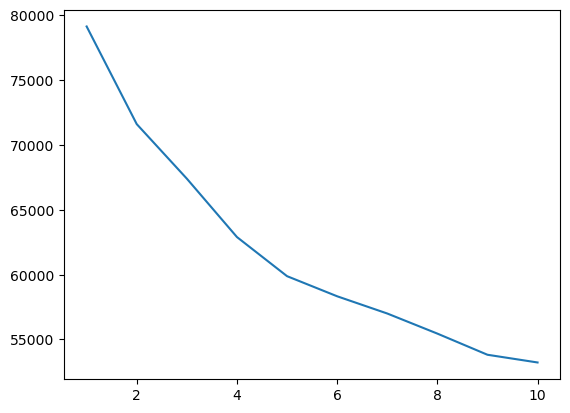

In [110]:
sns.lineplot(
    x = np.array(acum)[:,0], 
    y = np.array(acum)[:, 1]
)

Obtener cluster del modelo seleccionado

In [111]:
modelo = KMeans(
    n_clusters = 5,
    n_init = 10, 
    max_iter = 300 
)
modelo.fit(dm_estres_normalizada)

KMeans(n_clusters=5, n_init=10)

In [112]:
dm_estres["cluster"] = modelo.labels_ 

In [113]:
dm_estres.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,...,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,job_satisfaction_score,age_group,hours_bin,daily_social_media_time_bin,notificaciones_agrupadas,cluster
0,56,Male,Unemployed,4.2,Facebook,61,6.8,8.0,7.3,Nivel medio,...,False,False,4,Medio burnout,6.3,40-60,4-8,"(3.6, 5.4]",50–70,1
1,46,Male,Health,3.2,Twitter,59,9.2,5.1,5.2,Nivel medio,...,True,True,2,Alto burnout,3.4,40-60,0-4,"(1.8, 3.6]",50–70,3
2,32,Male,Finance,2.8,Twitter,57,7.9,3.9,3.5,Nivel medio,...,True,False,3,Medio burnout,2.5,20-40,0-4,"(1.8, 3.6]",50–70,3
3,60,Female,Unemployed,2.4,Facebook,59,6.4,2.9,1.8,Nivel medio,...,False,False,0,Poco burnout,1.7,40-60,0-4,"(1.8, 3.6]",50–70,4
4,25,Male,IT,1.9,Telegram,66,6.2,8.9,2.9,Nivel medio,...,False,True,1,Alto burnout,9.7,20-40,0-4,"(1.8, 3.6]",50–70,1


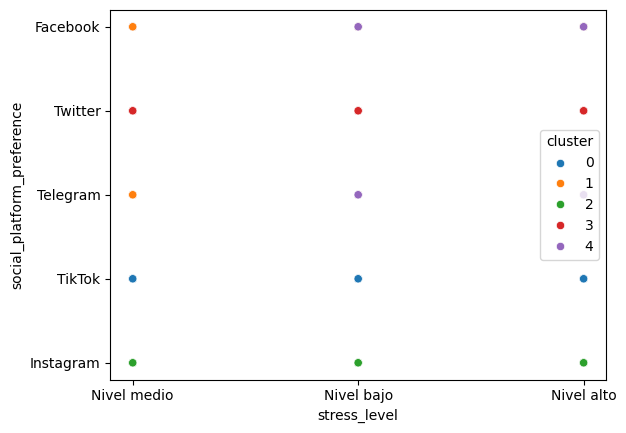

In [114]:
sns.scatterplot(
    data = dm_estres, 
    x = "stress_level", 
    y = "social_platform_preference",
    hue = "cluster", 
    palette = "tab10"
)
plt.show()

#### RANDOM FOREST - ESTRÉS

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [116]:
dm_estres2["stress_level"] = dm_estres2["stress_level"].replace({
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 1,
    7: 1,
    8: 1,
    9: 1,
    10: 1,
})

In [117]:
X = dm_estres2.drop(columns = "stress_level")
y = dm_estres2["stress_level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25
)

In [118]:
for i in range(1, 20):
    modelo = RandomForestClassifier(max_depth = i)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    sensibilidad = recall_score(y_test, y_pred)
    print(f"{i} -> {np.round(acc,4)}, {np.round(sensibilidad,4)}")

1 -> 0.5044, 0.9739
2 -> 0.4999, 0.8325
3 -> 0.4981, 0.7802
4 -> 0.4988, 0.6928
5 -> 0.5051, 0.6817
6 -> 0.5007, 0.5985
7 -> 0.5012, 0.5993
8 -> 0.5004, 0.5594
9 -> 0.4961, 0.5903
10 -> 0.4983, 0.5695
11 -> 0.4955, 0.5328
12 -> 0.4917, 0.5328
13 -> 0.4923, 0.5481
14 -> 0.4989, 0.5394
15 -> 0.4953, 0.5225
16 -> 0.4932, 0.5259
17 -> 0.4948, 0.5293
18 -> 0.5012, 0.5322
19 -> 0.5017, 0.5261


##### Matriz confusion estrés

In [119]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[1771, 1943],
       [1794, 1992]])

In [120]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

In [121]:
#Accuracy
(TN + TP) / (TN + TP + FN + FP)

np.float64(0.5017333333333334)

In [122]:
#Sensibilidad
TP / (TP + FN)

np.float64(0.526148969889065)

In [123]:
#Especifidad
TN / (TN + FP)

np.float64(0.47684437264404955)

# Modelo SOCIAL MEDIA  ↔  PRODUCTIVIDAD

#### RANDOM FOREST - PRODUCTIVIDAD

In [124]:
dm_prod = dm_estres2.copy()

In [125]:
dm_prod["actual_productivity_score"] = dm_prod["actual_productivity_score"].round(0)

In [126]:
dm_prod["actual_productivity_score"] = np.where(dm_prod["actual_productivity_score"] <= 5.0, 0, 1)

In [127]:
X = dm_prod.drop(columns = "actual_productivity_score")
y = dm_prod["actual_productivity_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25
)

In [128]:
for i in range(1, 15):
    modelo = RandomForestClassifier(max_depth = i)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    sensibilidad = recall_score(y_test, y_pred)
    print(f"{i} -> {np.round(acc,4)}, {np.round(sensibilidad,4)}")

1 -> 0.5805, 0.0
2 -> 0.8188, 0.7626
3 -> 0.8188, 0.7626
4 -> 0.8185, 0.7626
5 -> 0.8187, 0.7626
6 -> 0.8185, 0.7626
7 -> 0.8184, 0.7692
8 -> 0.8179, 0.7765
9 -> 0.8185, 0.7676
10 -> 0.8173, 0.7686
11 -> 0.8193, 0.7689
12 -> 0.8172, 0.7667
13 -> 0.8189, 0.7664
14 -> 0.8209, 0.7724


##### Matriz confusion productividad

In [129]:
matriz_confusion_prod = confusion_matrix(y_test, y_pred)
matriz_confusion_prod

array([[3727,  627],
       [ 716, 2430]])

In [130]:
TN = matriz_confusion_prod[0][0]
TP = matriz_confusion_prod[1][1]
FN = matriz_confusion_prod[1][0]
FP = matriz_confusion_prod[0][1]

In [131]:
#Accuracy
(TN + TP) / (TN + TP + FN + FP)

np.float64(0.8209333333333333)

In [132]:
#Sensibilidad
TP / (TP + FN)

np.float64(0.7724094087730451)

In [133]:
#Especifidad
TN / (TN + FP)

np.float64(0.8559944878272853)

# **Conclusiones**

Como se puede ver en los dos modelos de Random Forest, los resultados obtenidos son coherentes con el planteamiento del problema.
En el primer modelo, al trabajar con los valores originales de estrés, el rendimiento se sitúa alrededor del 50 %, lo que equivale prácticamente a una predicción aleatoria. Este resultado es esperable, ya que el modelo intenta predecir una variable compleja a partir de un conjunto de variables que no muestran una correlación clara entre sí, lo que limita su capacidad para encontrar patrones consistentes.

En cambio, en el segundo modelo se simplifica el problema transformando tanto el nivel de estrés como la productividad en variables binarias (alto / bajo). Al reducir la complejidad del objetivo a una clasificación más sencilla de tipo sí/no, el modelo puede identificar relaciones más claras entre las variables y, como consecuencia, el nivel de acierto aumenta hasta situarse en torno al 80 %.

No obstante, a pesar del mejor rendimiento obtenido en el segundo enfoque, se considera más representativo el primer modelo, ya que mantiene en mayor medida la naturaleza original de los datos. En el segundo caso, la binarización implica una modificación más profunda de las variables de partida, lo que, si bien mejora la capacidad predictiva, también simplifica en exceso la realidad que se pretende modelar.

En este sentido, los resultados ponen de manifiesto que una reformulación adecuada del problema puede mejorar el rendimiento del modelo, pero también evidencian el compromiso existente entre precisión predictiva y fidelidad a los datos originales.

In [137]:
dm_estres2.to_csv("dm_estres2.csv", index=False)